In [1]:
from google.colab import files
uploaded = files.upload()


Saving Patients_hopital.csv to Patients_hopital.csv


In [ ]:
pip install statsmodels

In [35]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


In [36]:
df = pd.read_csv('Patients_hopital.csv', sep=';', index_col=0)
df.head()

,GENRE,AGE,TAILLE,POIDS,TTAILLE,SYS,DIA,IMC,JMBG,COUD,POIGN,BRAS
Identifiant_patient,,,,,,,,,,,,
I0001,0,58,179.8,76.7,90.6,125,78,23.8,42.5,7.7,6.4,31.9
I0002,0,22,168.1,65.4,78.1,107,54,23.2,40.2,7.6,6.2,31.0
I0003,0,32,182.1,81.3,96.5,126,81,24.6,44.4,7.3,5.8,32.7
I0004,0,31,174.5,79.7,87.7,110,68,26.2,42.8,7.5,5.9,33.4
I0005,0,28,171.7,69.2,87.1,110,66,23.5,40.0,7.1,6.0,30.1


In [37]:
df.describe()

,GENRE,AGE,TAILLE,POIDS,TTAILLE,SYS,DIA,IMC,JMBG,COUD,POIGN,BRAS
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,34.350000,167.040000,72.292500,88.158750,114.850000,70.325000,25.868750,40.71750,6.835000,5.433750,31.272500
std,0.503155,13.175639,9.803882,15.816637,13.229108,14.671163,10.790027,4.959216,3.83712,0.710874,0.501881,4.392542
min,0.000000,12.000000,144.800000,42.800000,66.700000,89.000000,41.000000,17.700000,27.00000,5.400000,4.200000,23.000000
25%,0.000000,23.750000,160.225000,61.200000,76.725000,107.000000,64.000000,22.525000,38.92500,6.300000,5.075000,27.750000
50%,0.500000,32.000000,168.000000,73.000000,87.700000,113.000000,71.000000,25.350000,40.85000,6.900000,5.400000,31.500000
75%,1.000000,42.500000,173.500000,81.375000,97.325000,124.000000,79.000000,28.550000,42.95000,7.400000,5.800000,34.000000
max,1.000000,73.000000,193.500000,116.100000,126.500000,181.000000,102.000000,44.900000,48.60000,8.300000,6.700000,43.800000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, I0001 to I0080
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GENRE    80 non-null     int64  
 1   AGE      80 non-null     int64  
 2   TAILLE   80 non-null     float64
 3   POIDS    80 non-null     float64
 4   TTAILLE  80 non-null     float64
 5   SYS      80 non-null     int64  
 6   DIA      80 non-null     int64  
 7   IMC      80 non-null     float64
 8   JMBG     80 non-null     float64
 9   COUD     80 non-null     float64
 10  POIGN    80 non-null     float64
 11  BRAS     80 non-null     float64
dtypes: float64(8), int64(4)
memory usage: 8.1+ KB


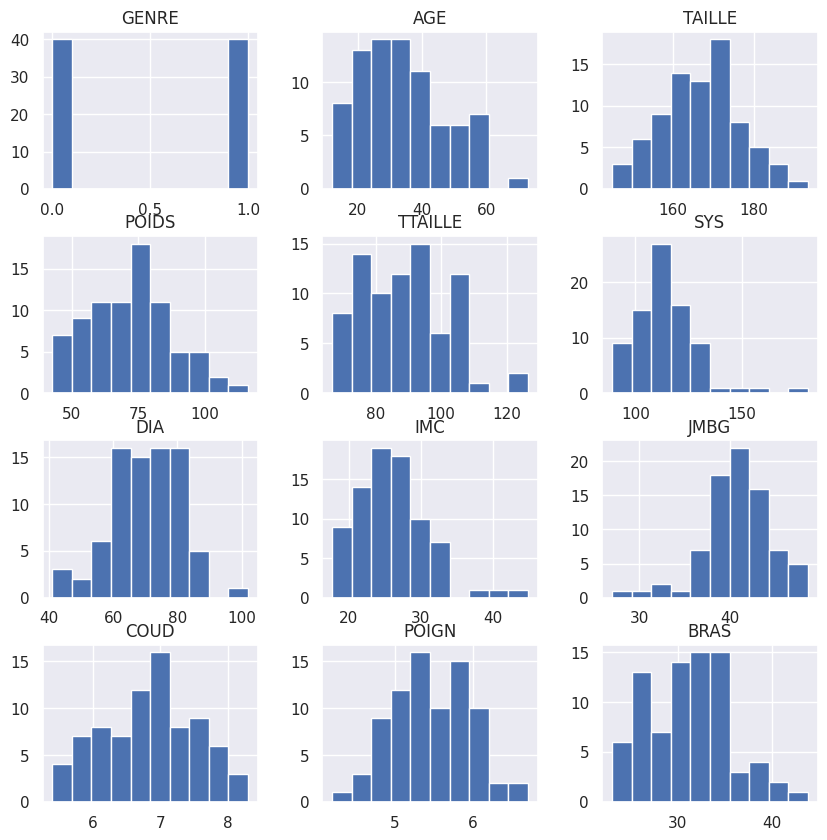

In [39]:
df.hist(figsize=(10,10))
plt.show()

In [40]:
corr=df.corr().abs()
corr

,GENRE,AGE,TAILLE,POIDS,TTAILLE,SYS,DIA,IMC,JMBG,COUD,POIGN,BRAS
GENRE,1.000000,0.085924,0.670008,0.379991,0.237807,0.277793,0.270462,0.026126,0.486486,0.651173,0.734359,0.255441
AGE,0.085924,1.000000,0.214391,0.428297,0.545529,0.397437,0.572510,0.384793,0.088506,0.330328,0.227711,0.375817
TAILLE,0.670008,0.214391,1.000000,0.544577,0.314126,0.275597,0.255423,0.004111,0.715001,0.678558,0.654606,0.236953
POIDS,0.379991,0.428297,0.544577,1.000000,0.908252,0.582703,0.478850,0.835660,0.304103,0.795703,0.653541,0.871594
TTAILLE,0.237807,0.545529,0.314126,0.908252,1.000000,0.627269,0.566345,0.879905,0.058024,0.633105,0.527594,0.853285
SYS,0.277793,0.397437,0.275597,0.582703,0.627269,1.000000,0.726850,0.511327,0.036559,0.480654,0.379592,0.465536
DIA,0.270462,0.572510,0.255423,0.478850,0.566345,0.726850,1.000000,0.401820,0.104058,0.328224,0.256709,0.379732
IMC,0.026126,0.384793,0.004111,0.835660,0.879905,0.511327,0.401820,1.000000,0.109796,0.521706,0.360148,0.892289
JMBG,0.486486,0.088506,0.715001,0.304103,0.058024,0.036559,0.104058,0.109796,1.000000,0.432138,0.435877,0.095987
COUD,0.651173,0.330328,0.678558,0.795703,0.633105,0.480654,0.328224,0.521706,0.432138,1.000000,0.802036,0.708514


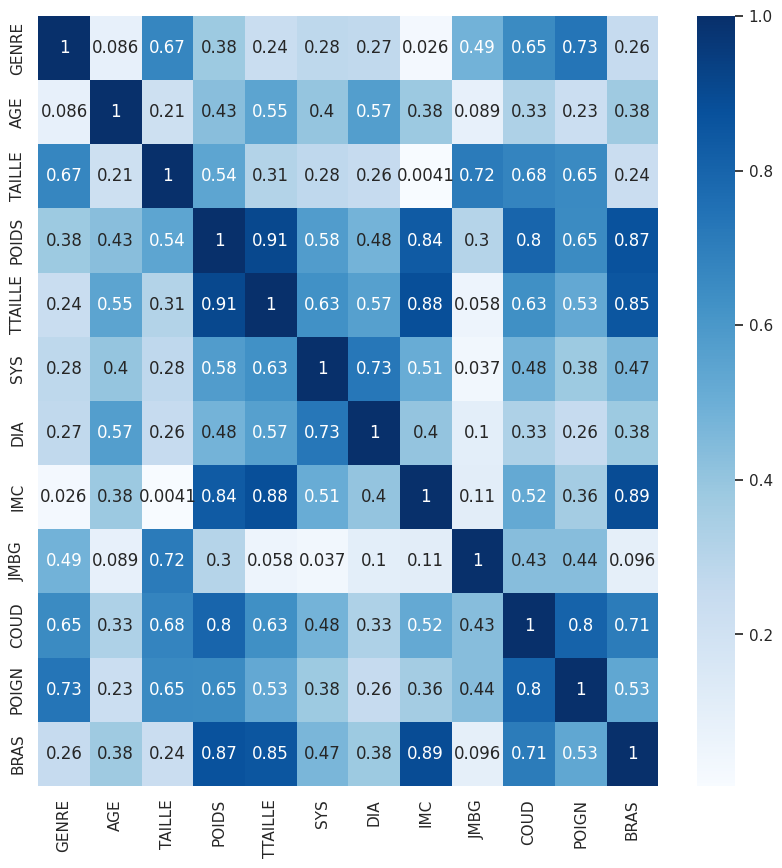

In [41]:
corr= df.corr().abs()
corr
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

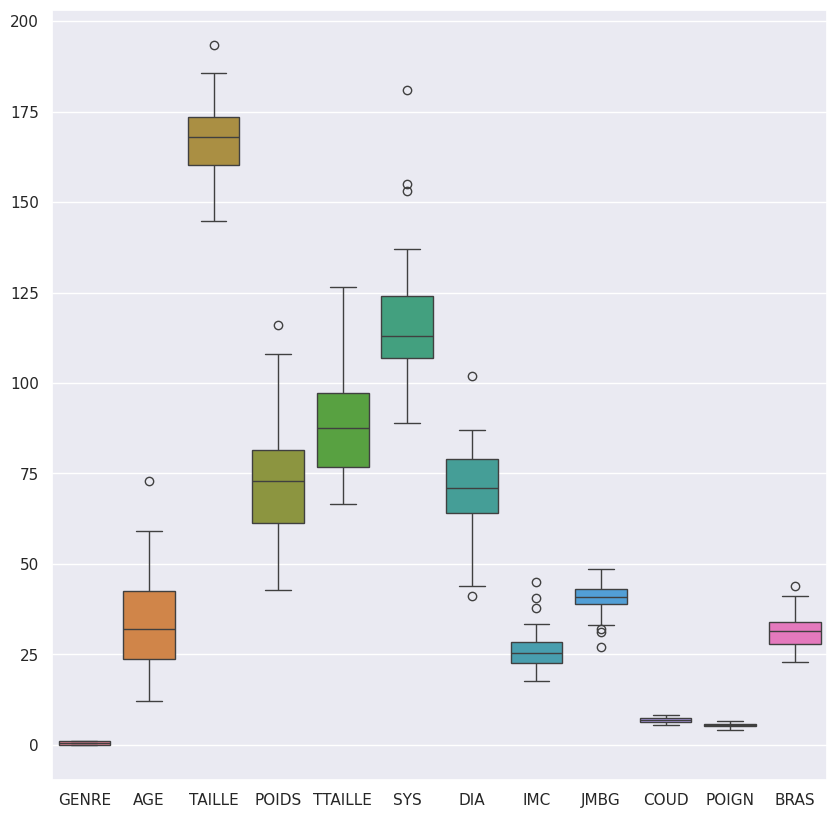

In [42]:
sns.boxplot(data=df)
sns.set(rc={'figure.figsize':(30,10)})
plt.show()

In [43]:
#drop_outlier
for col in df.columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
  df.reset_index(drop=True, inplace=True)


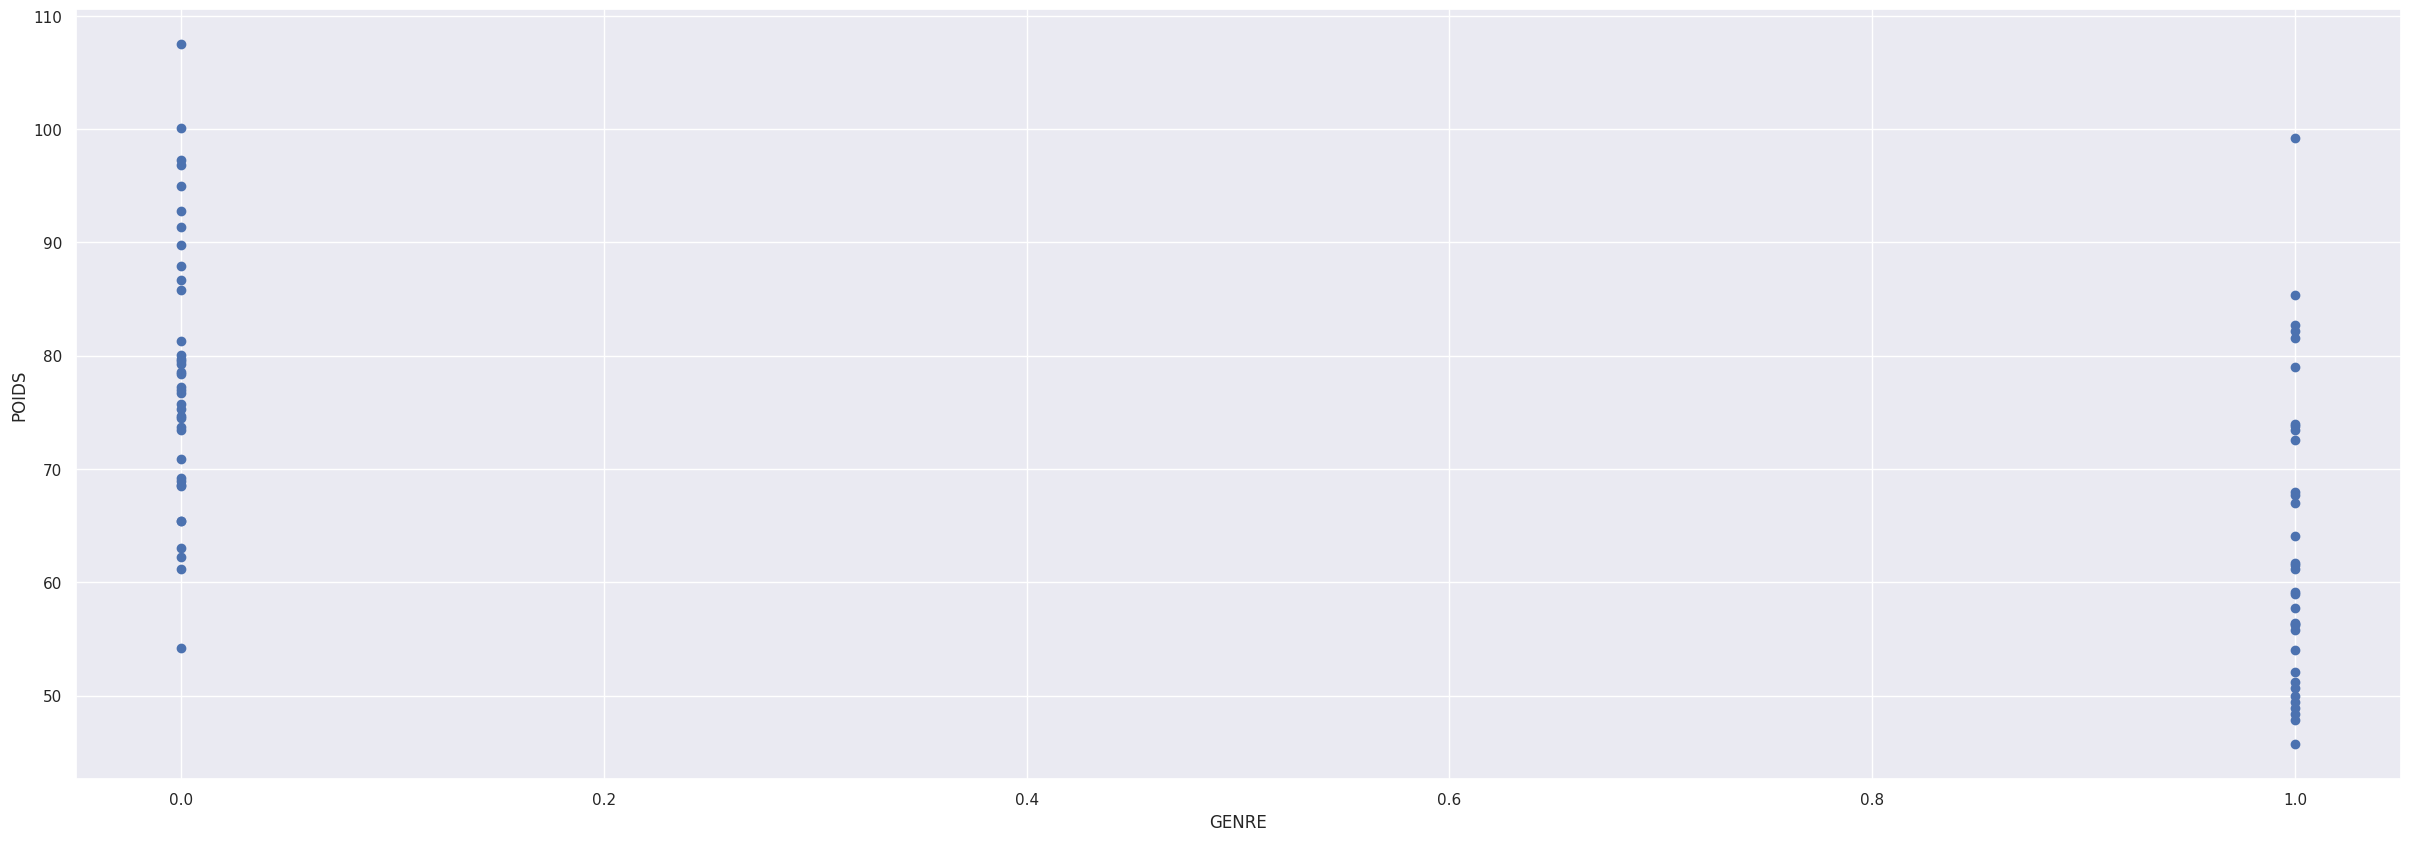

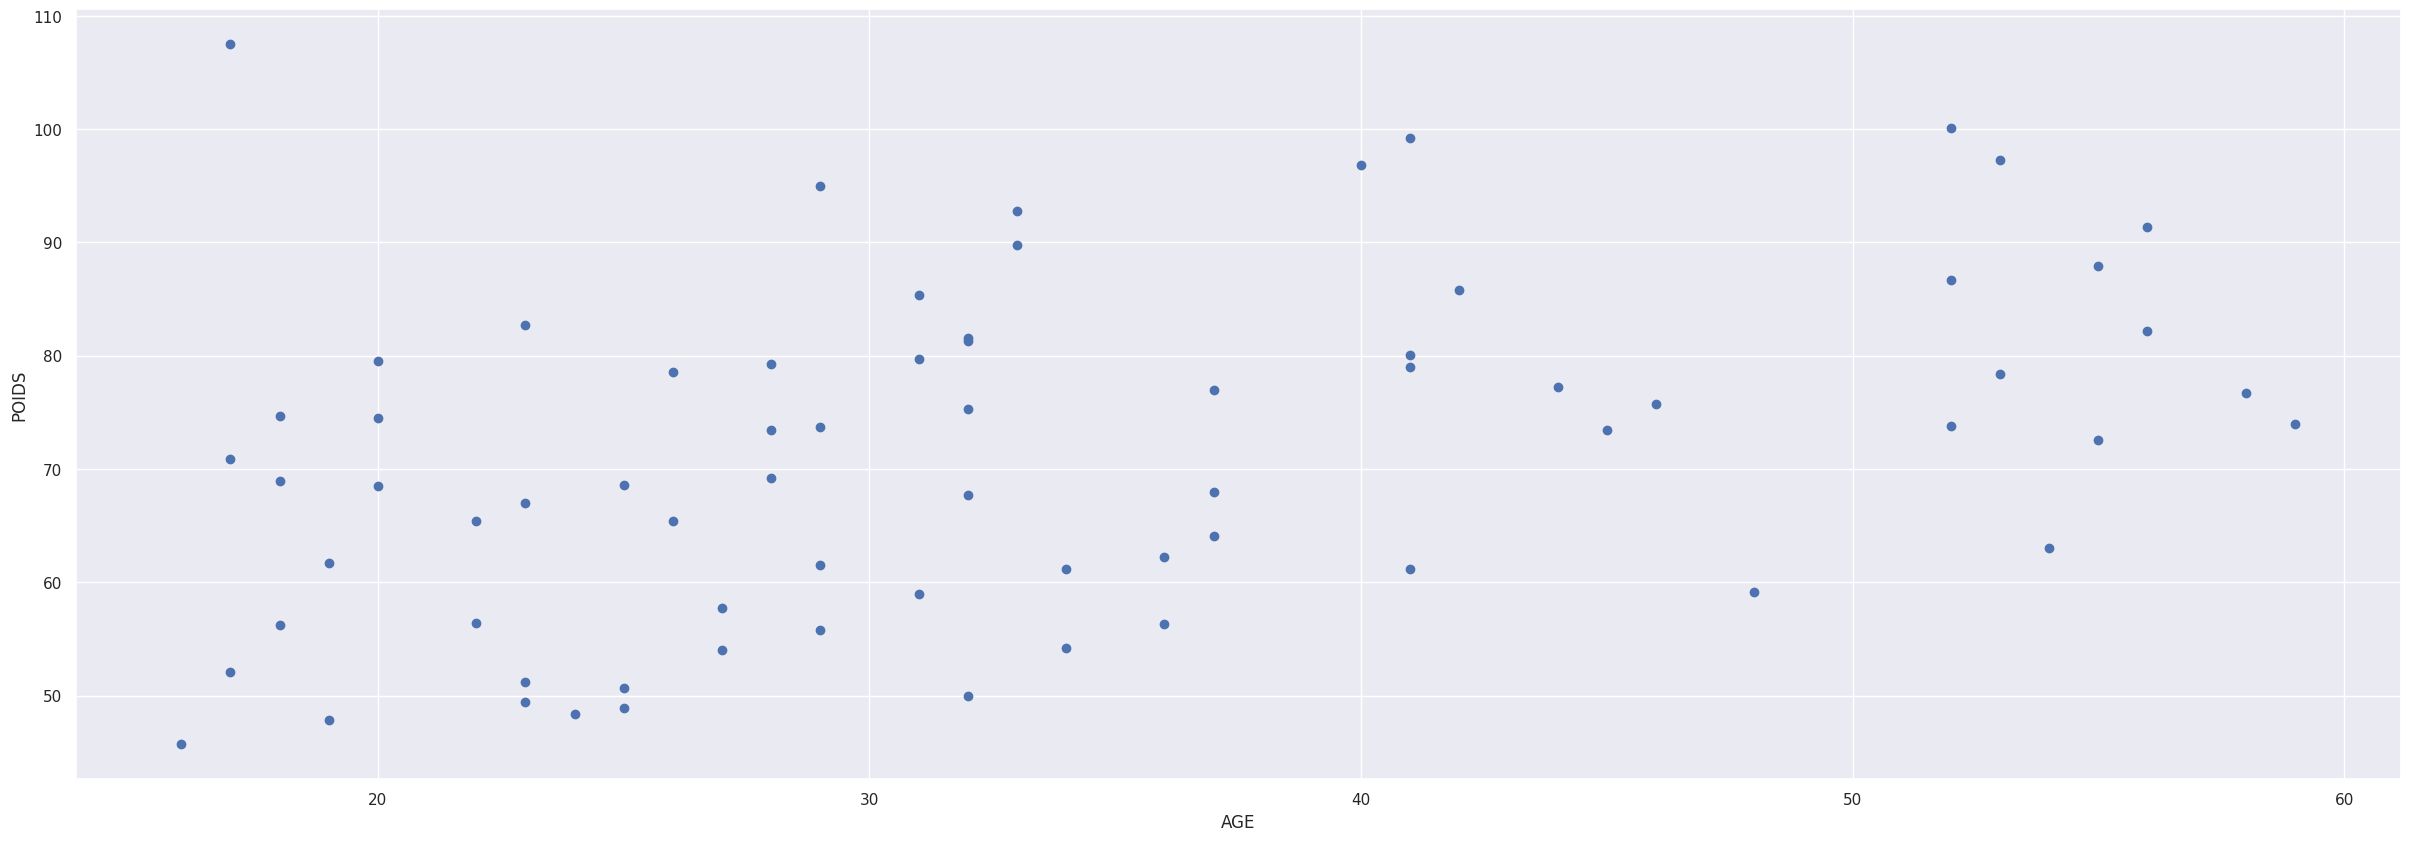

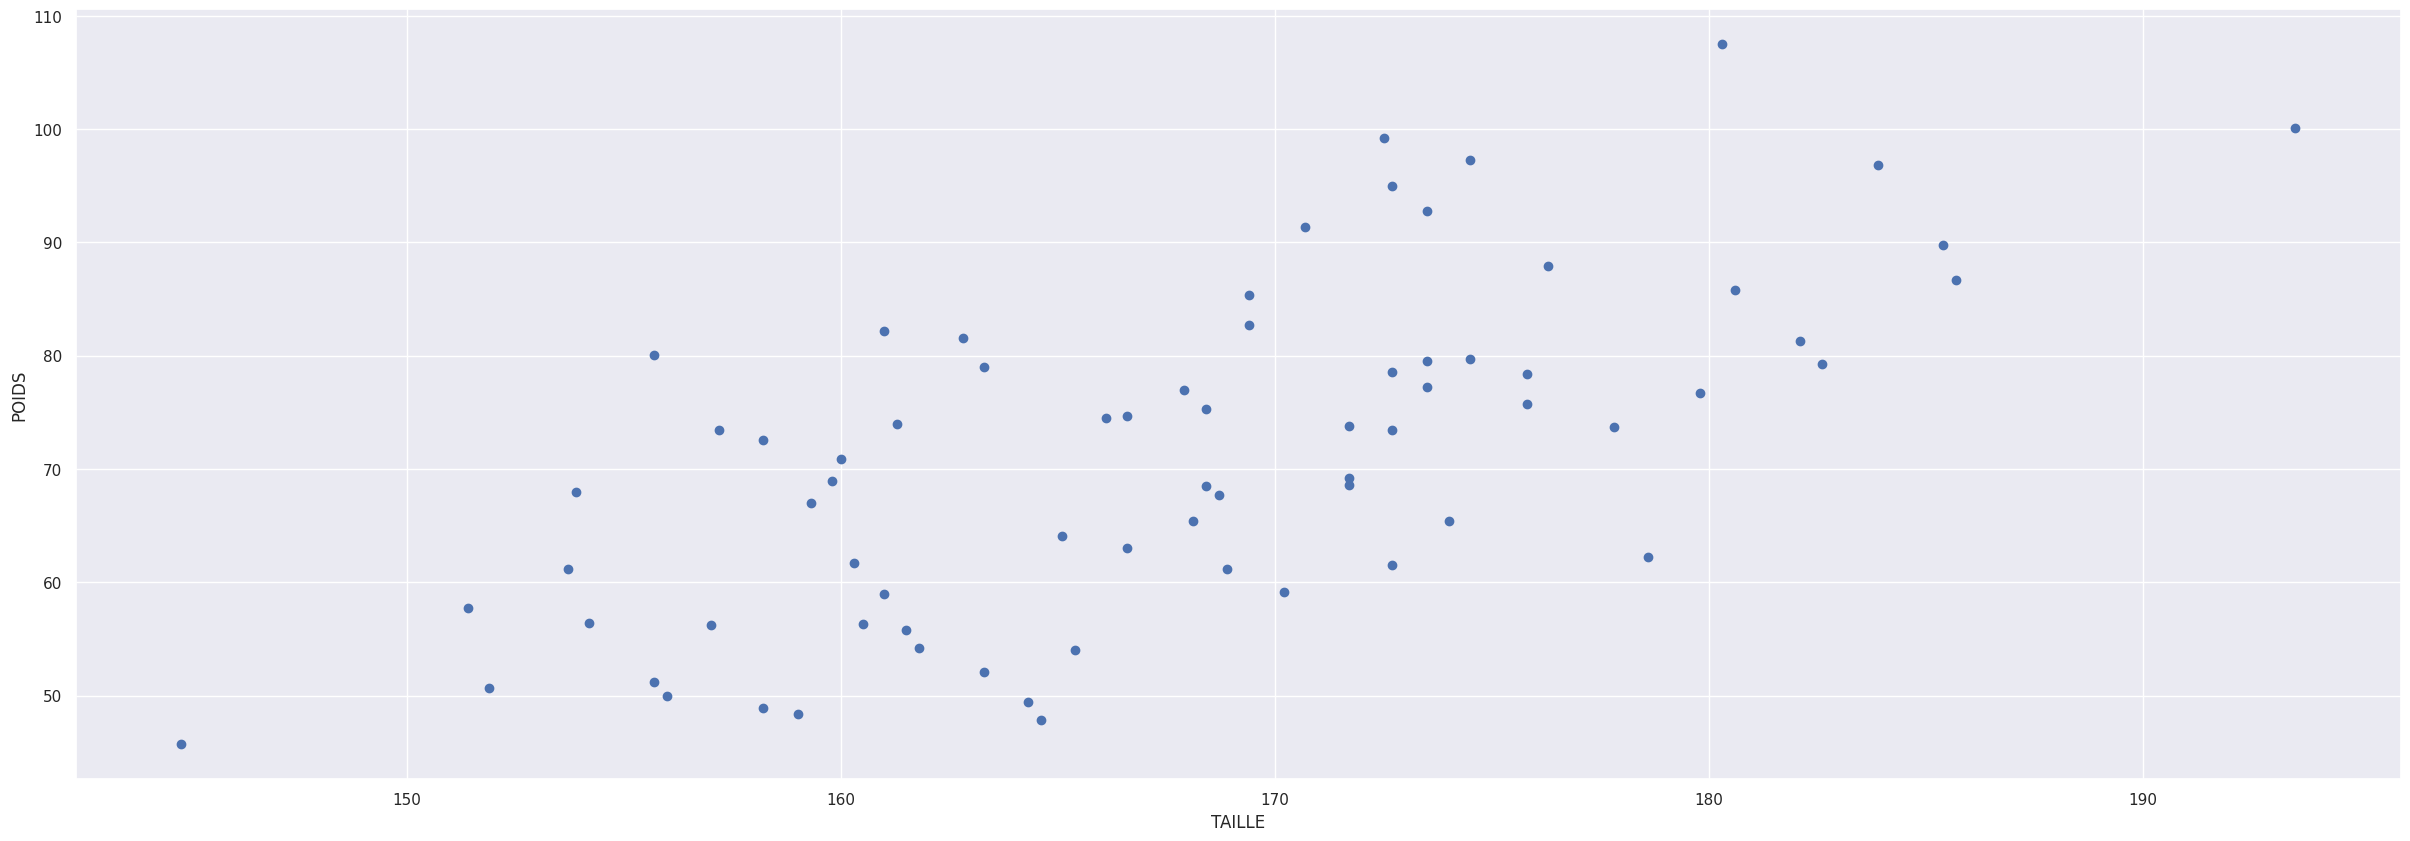

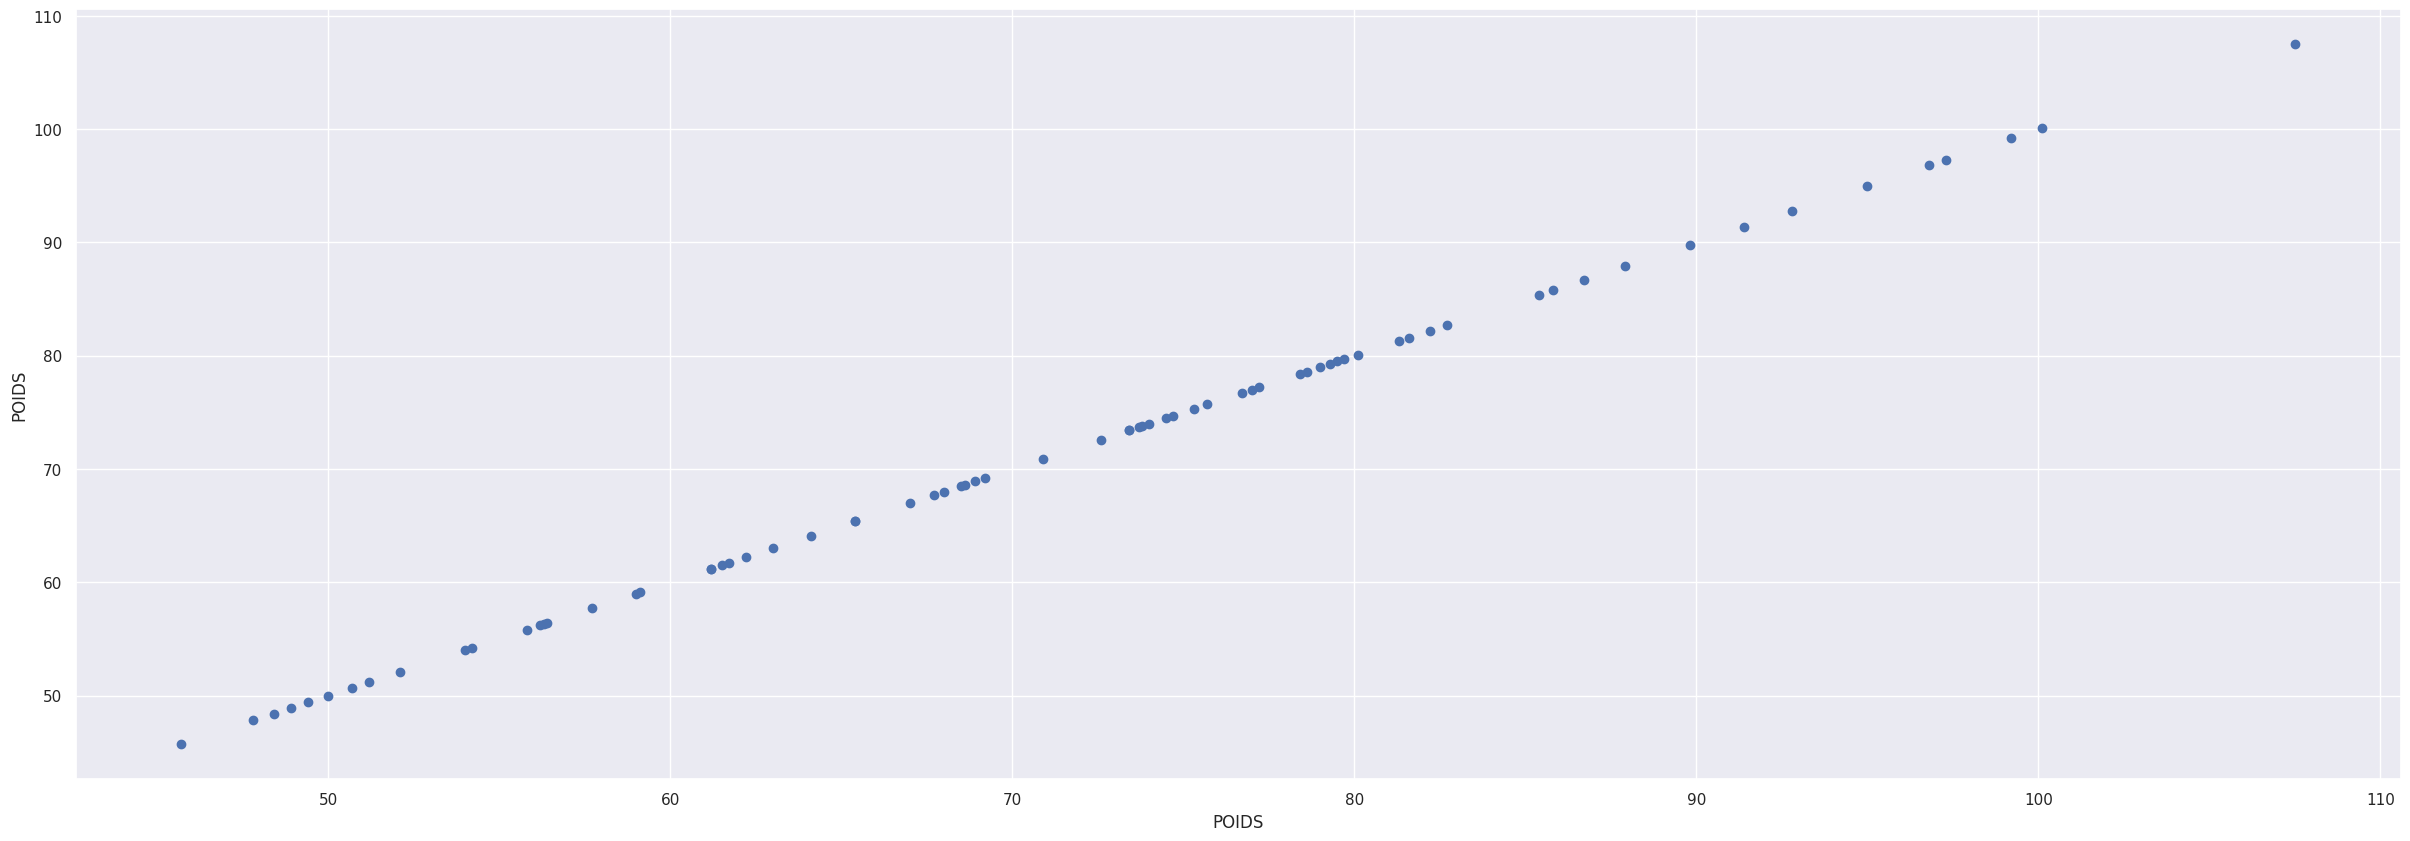

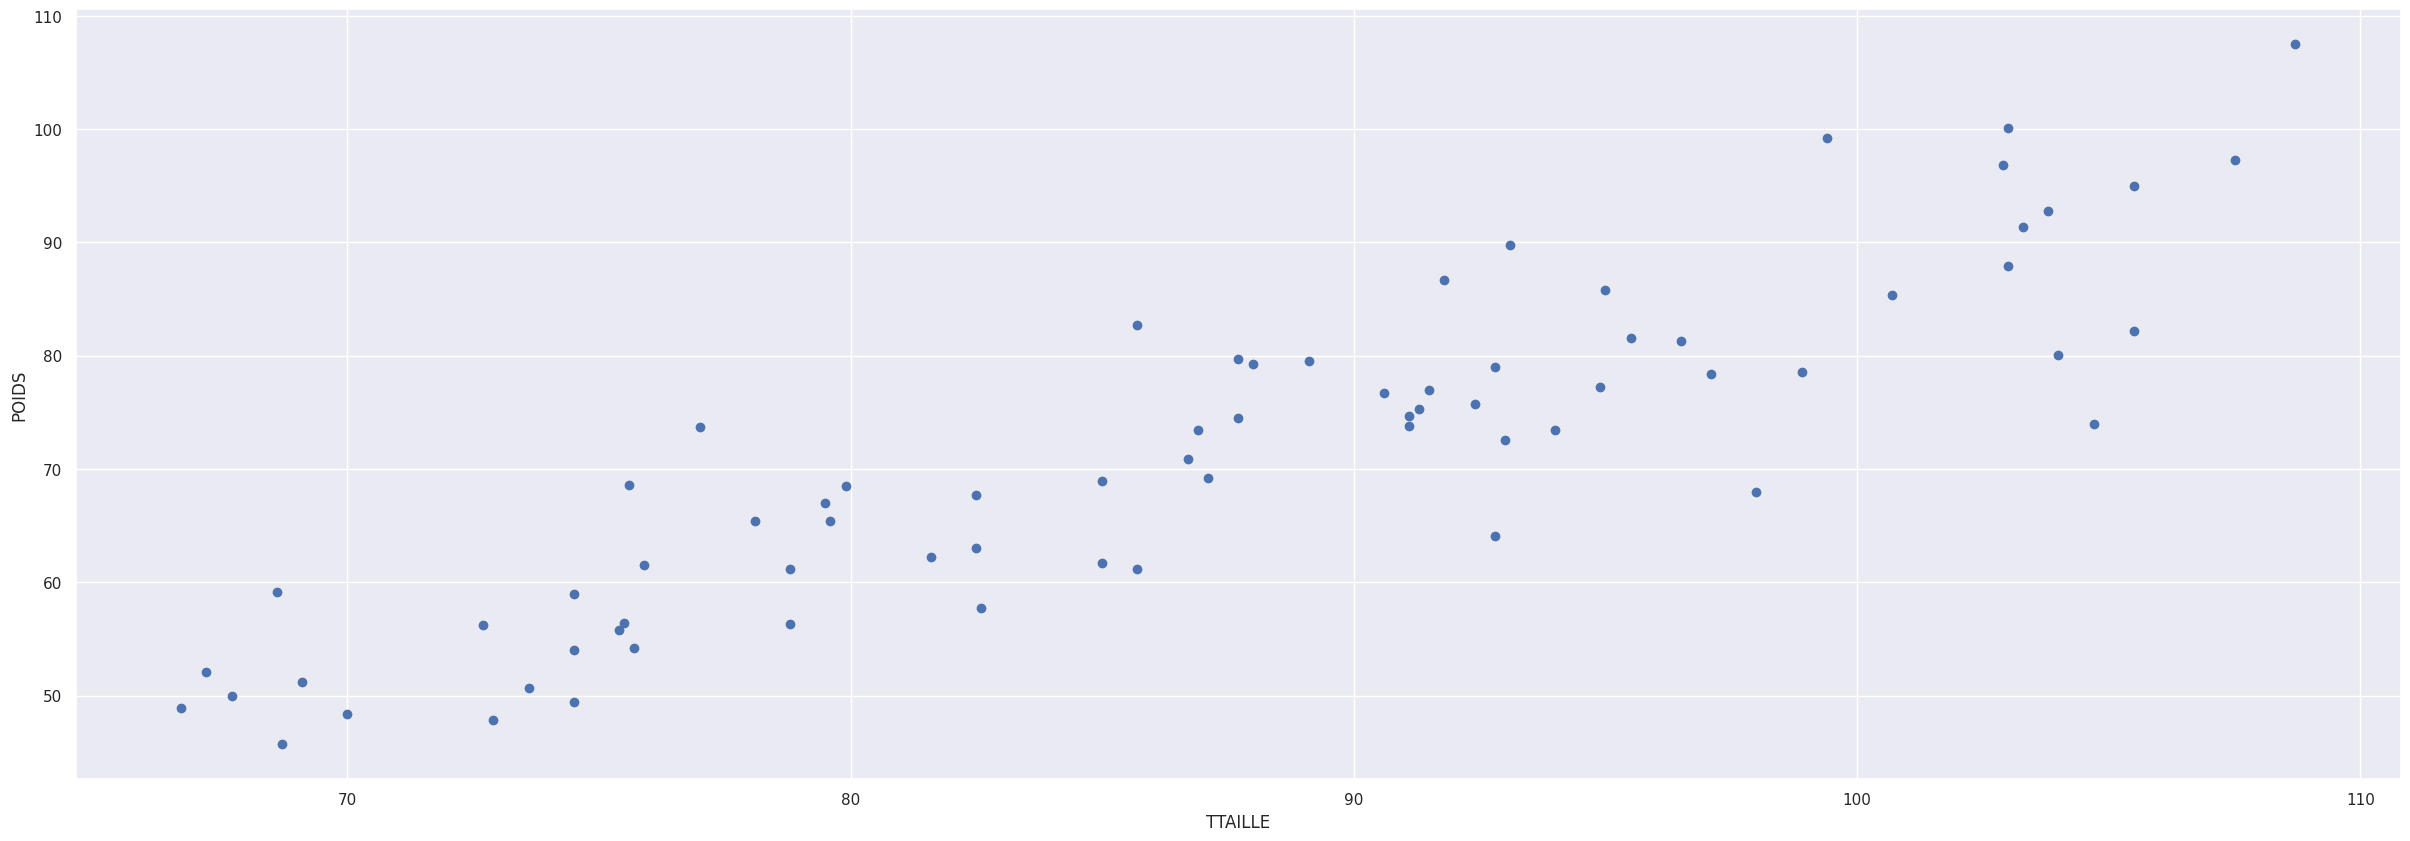

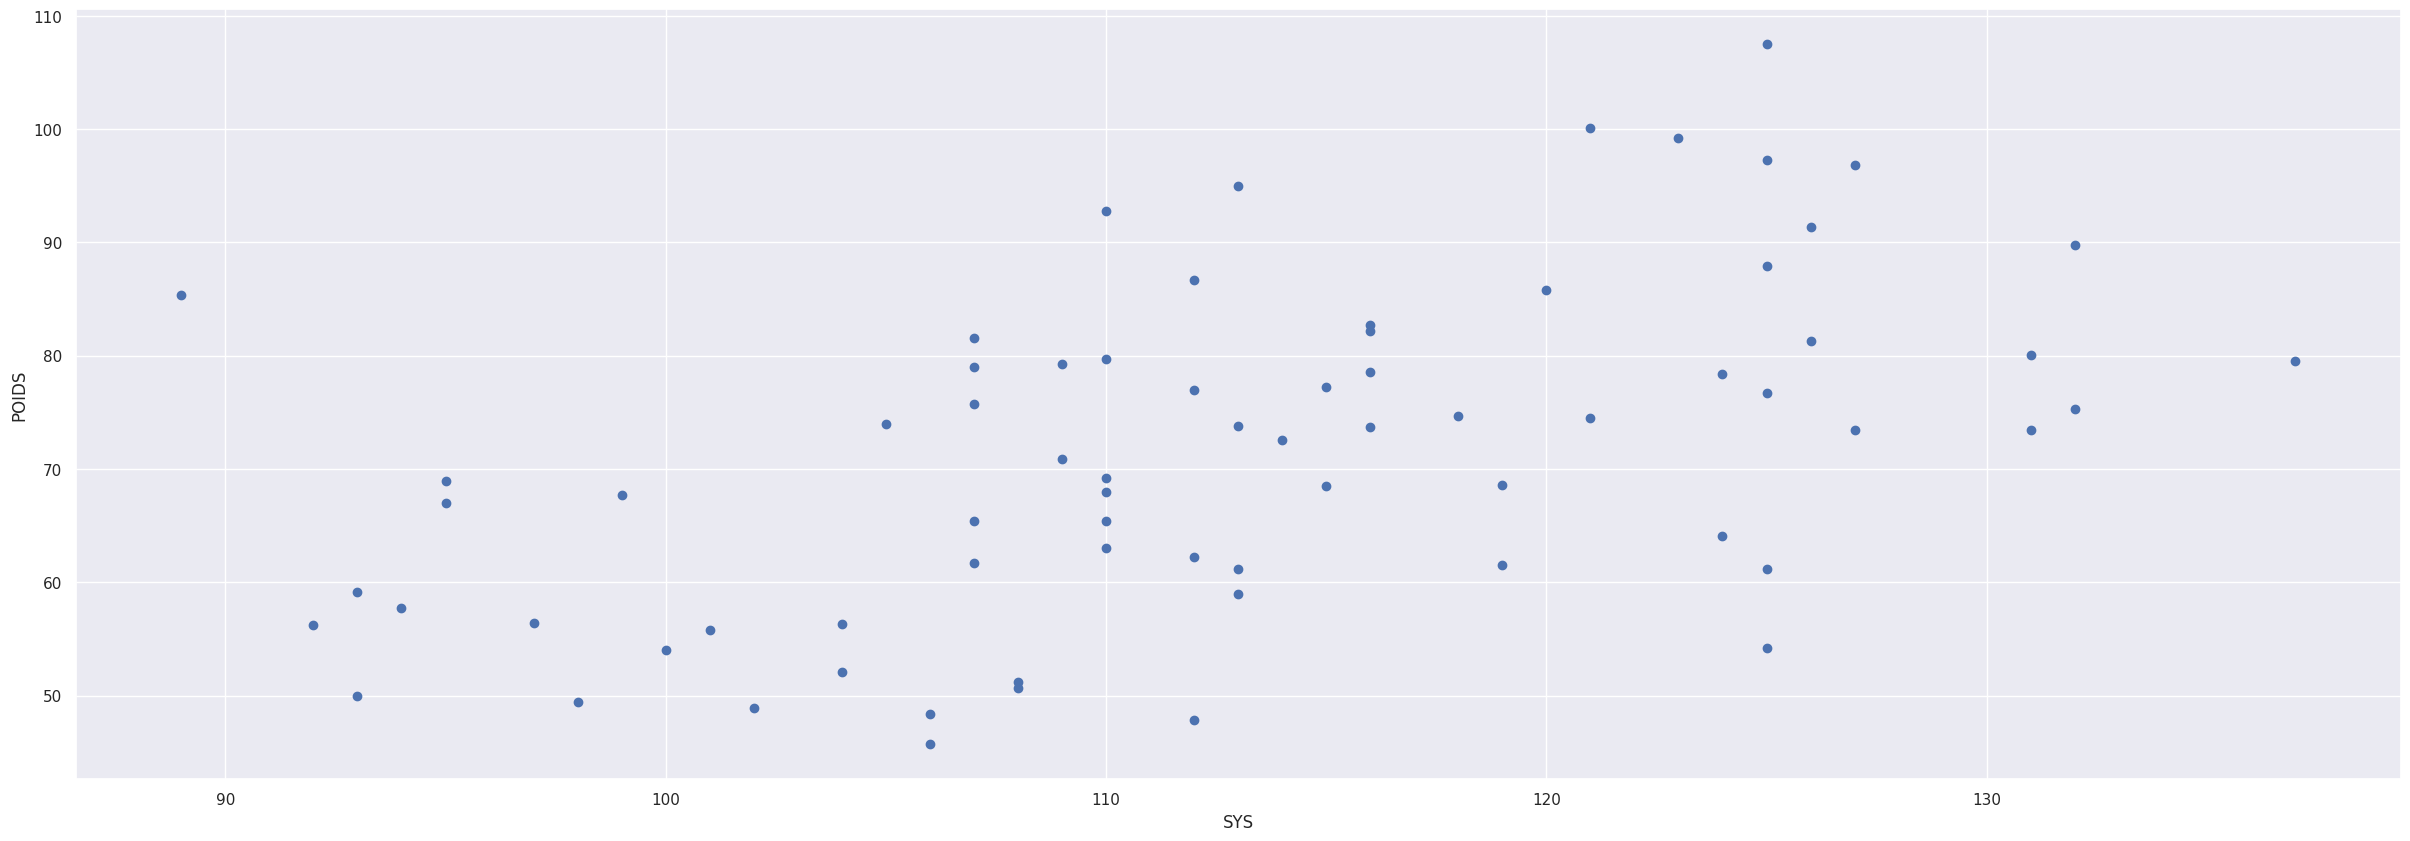

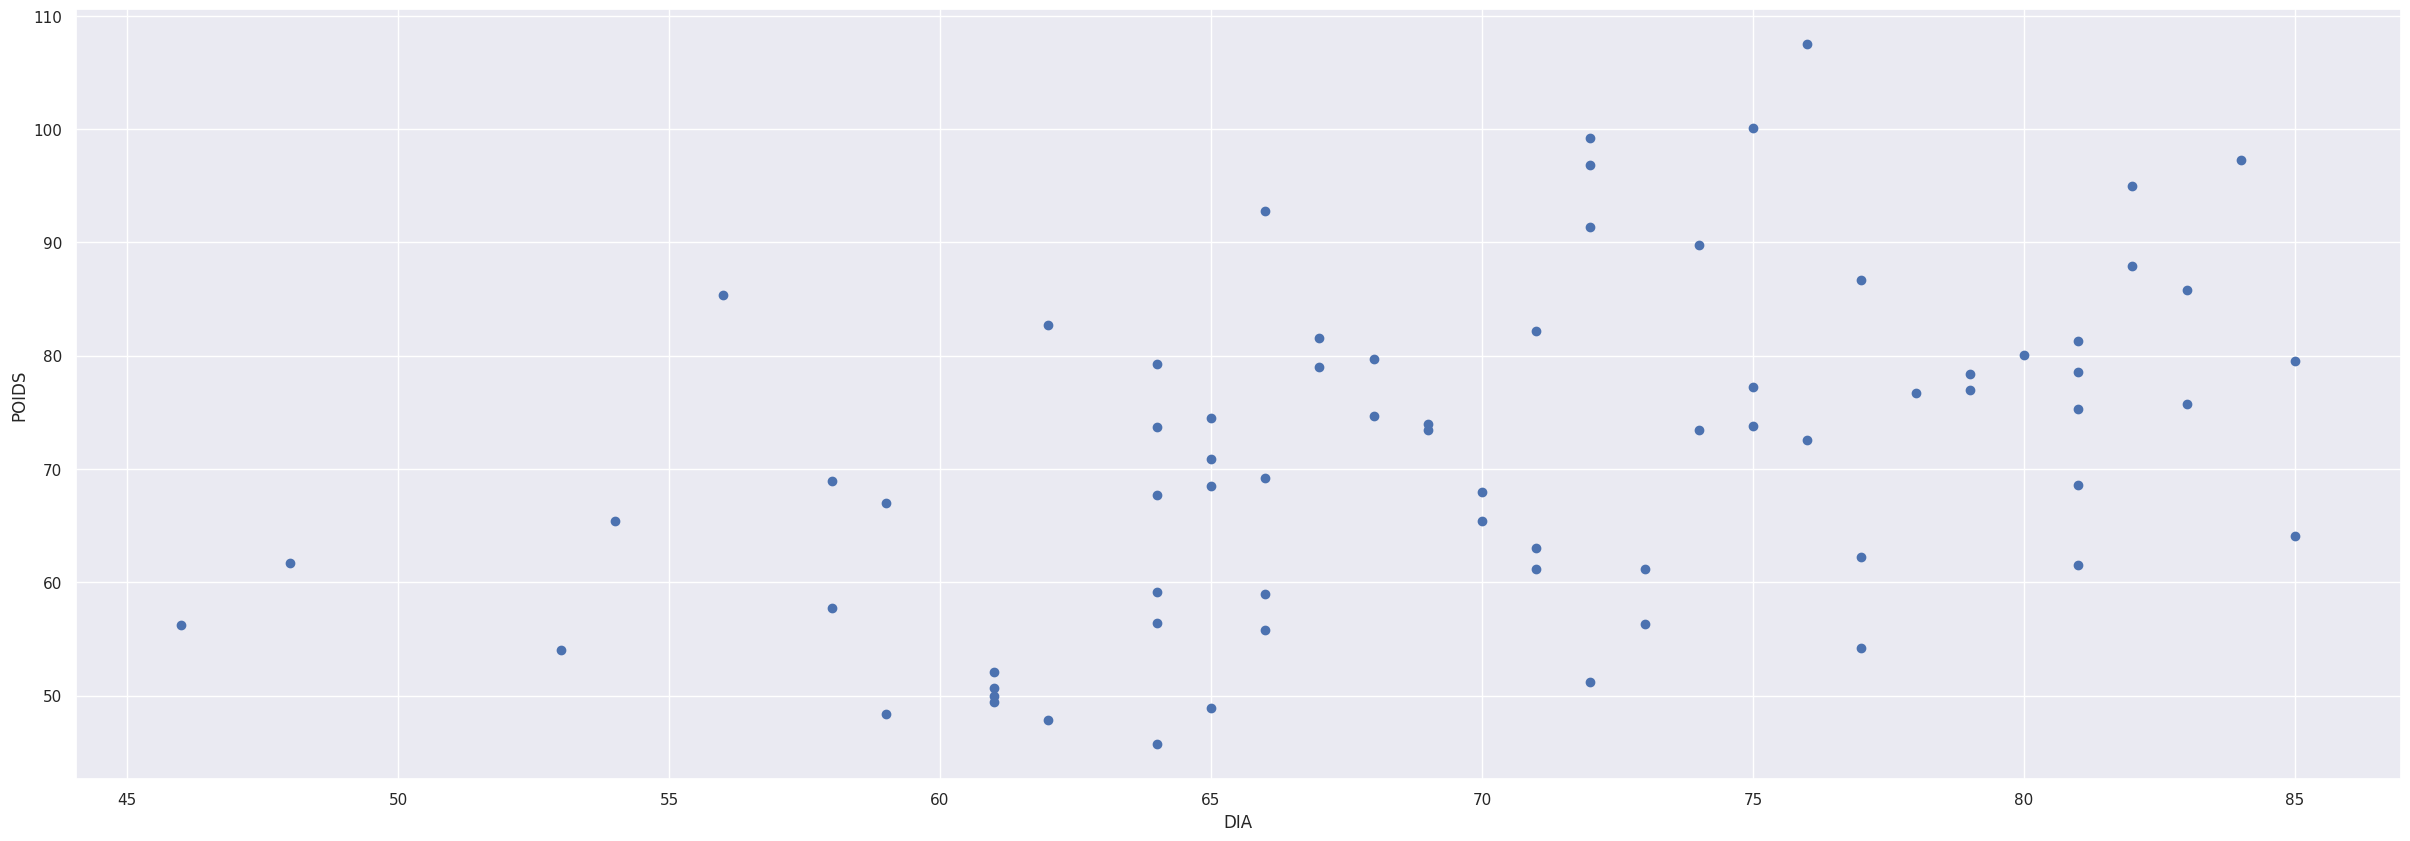

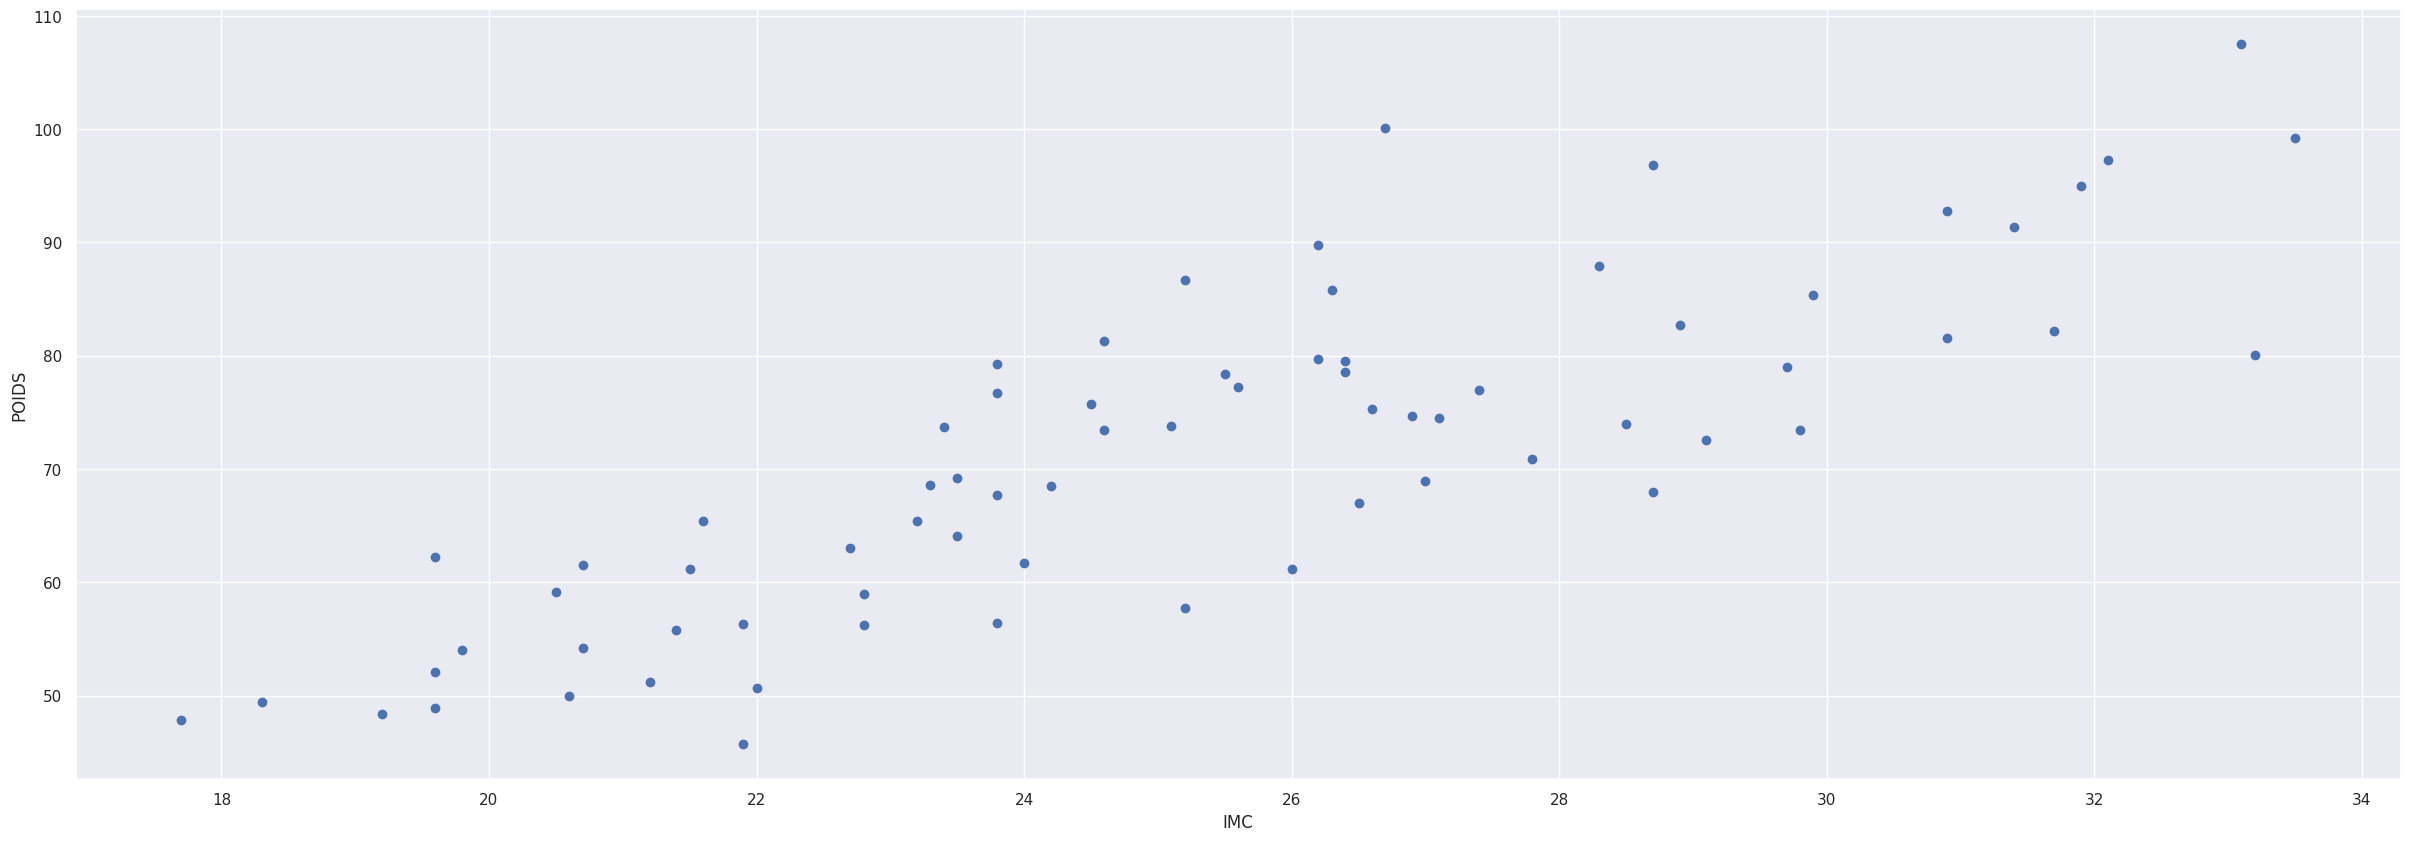

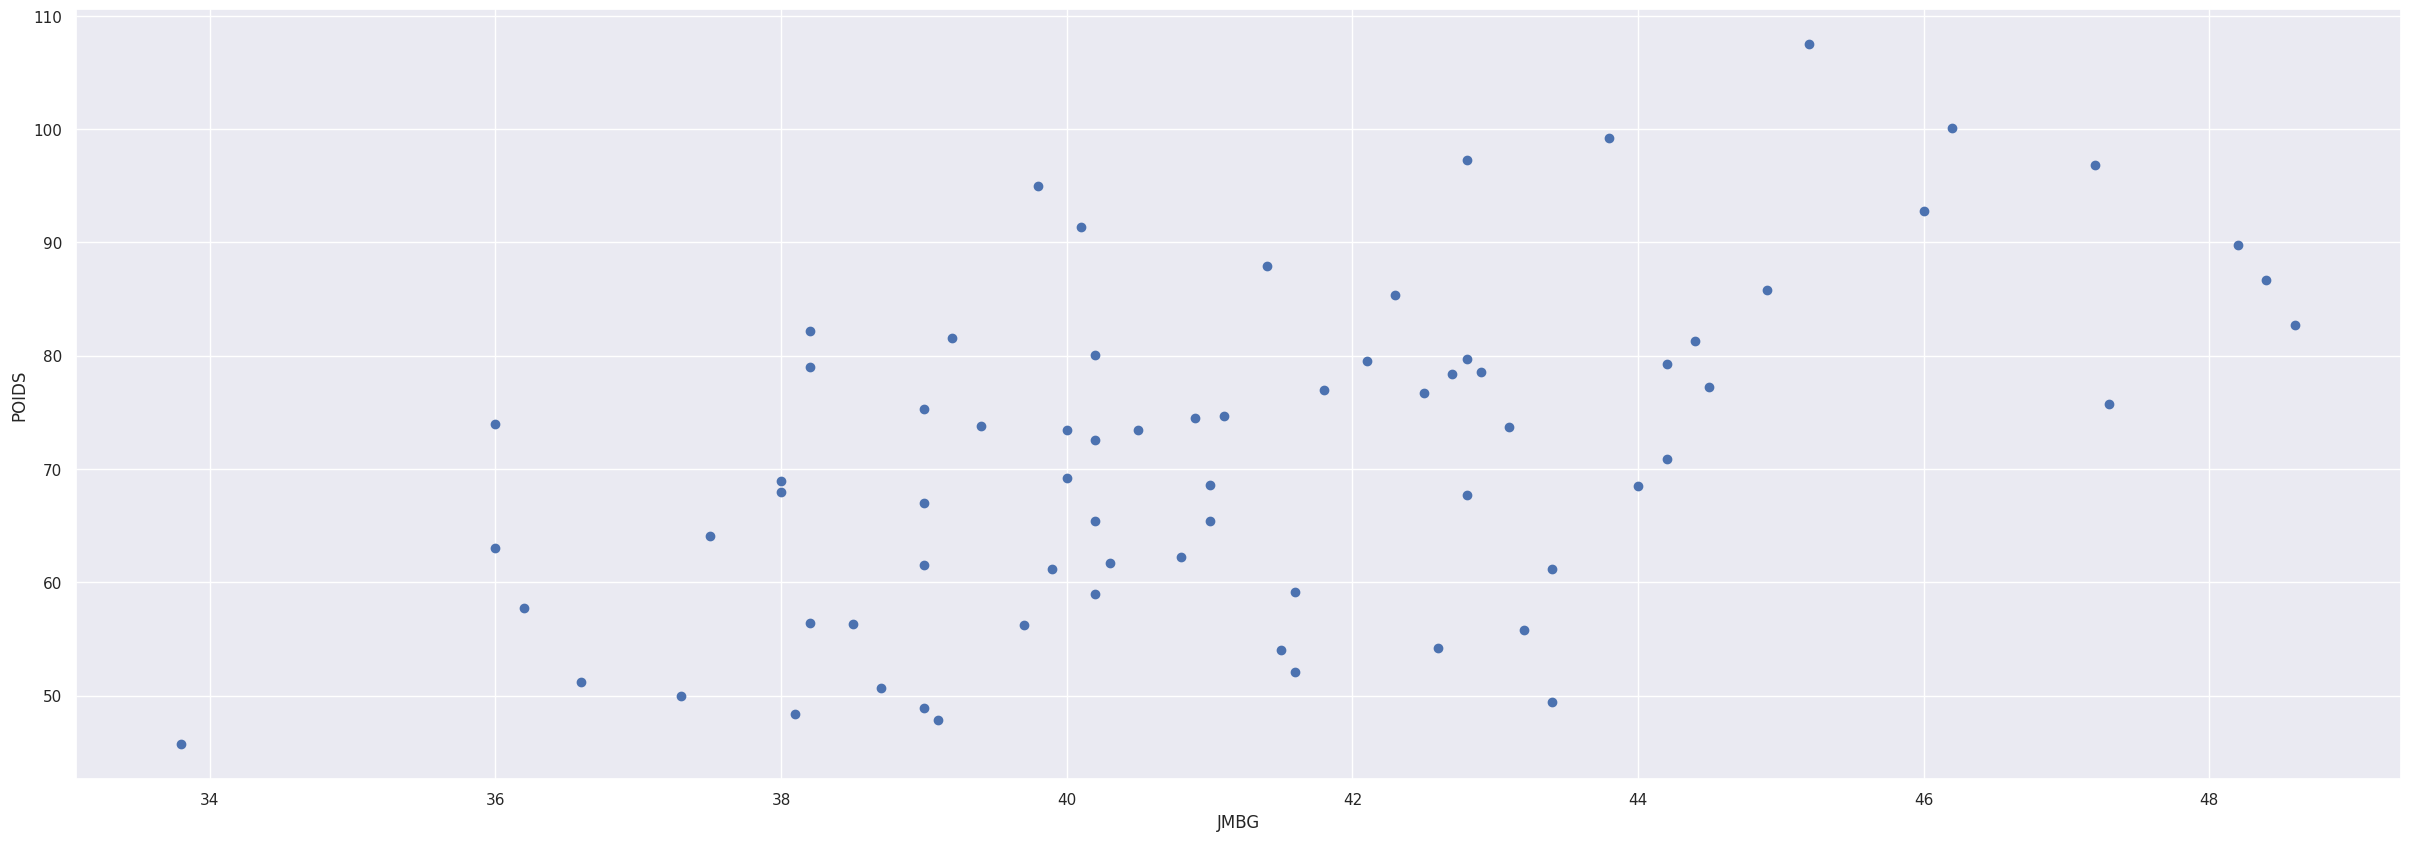

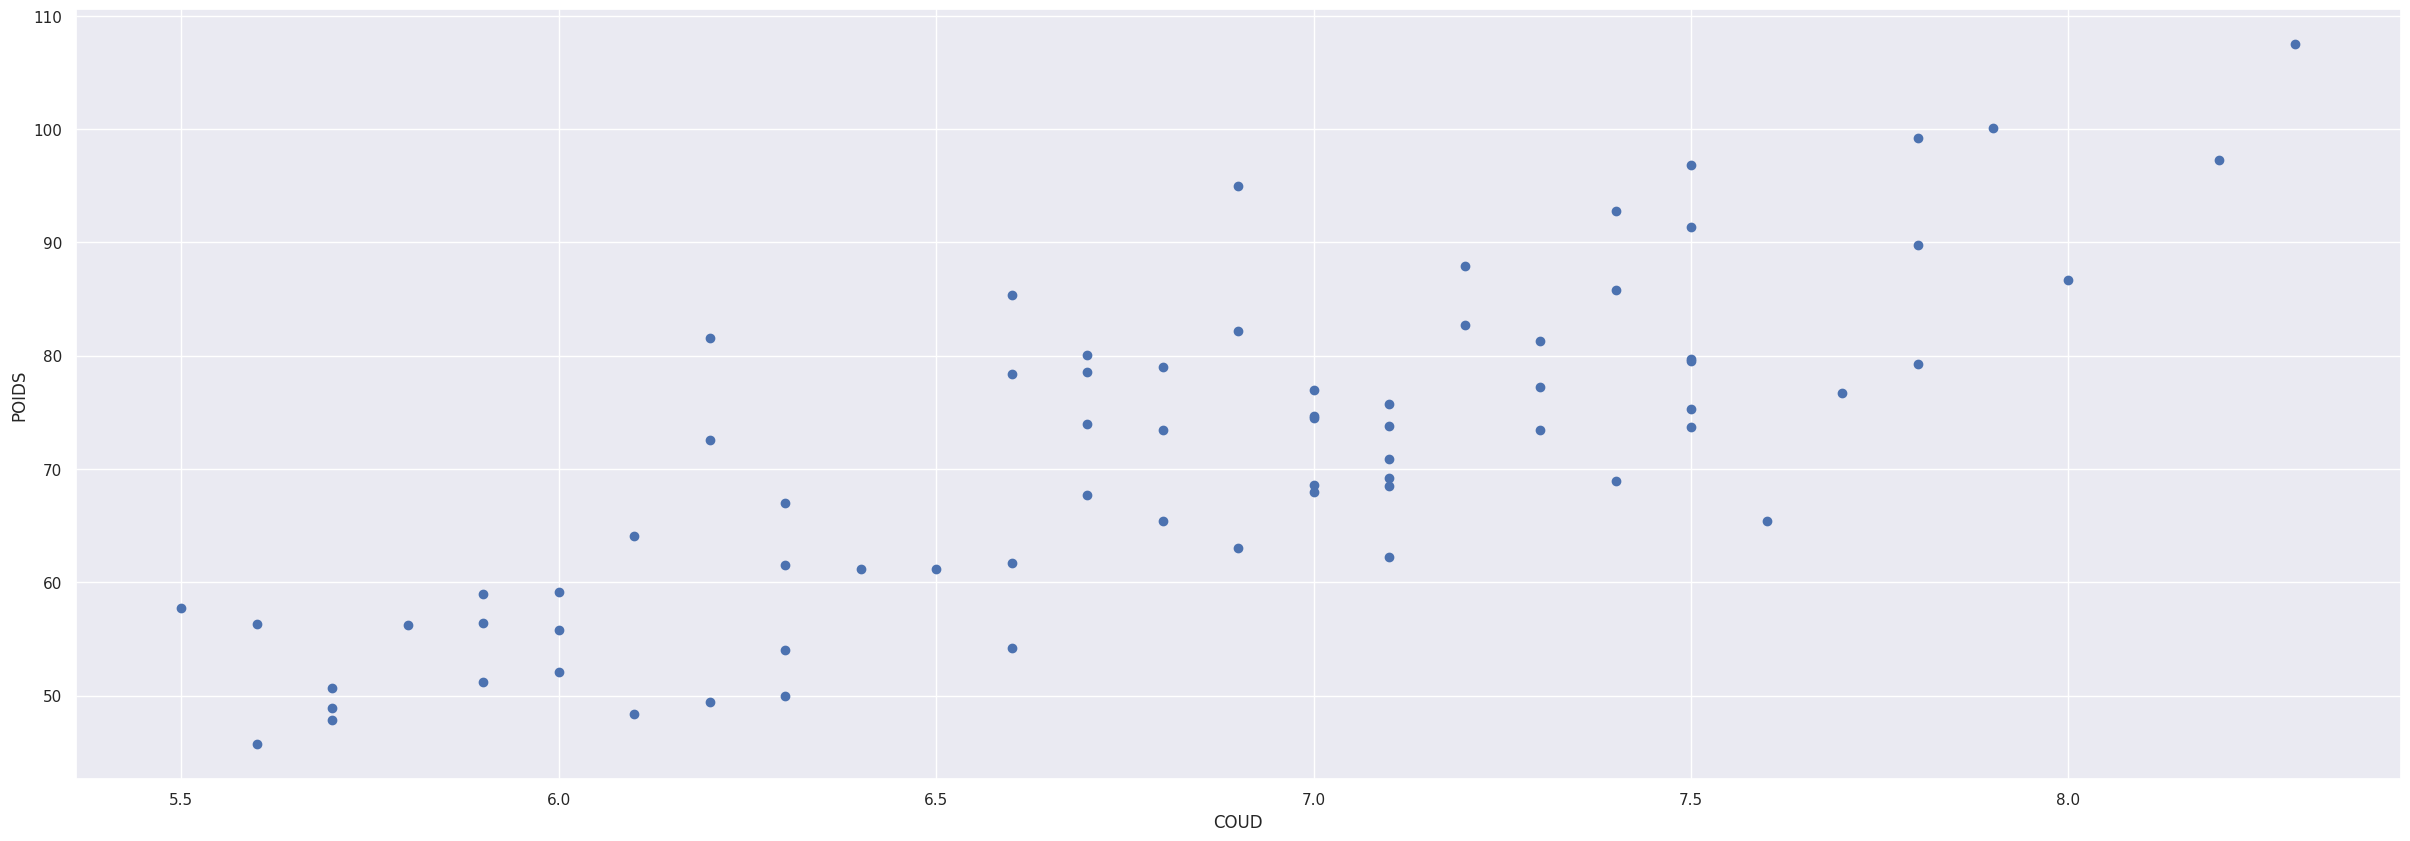

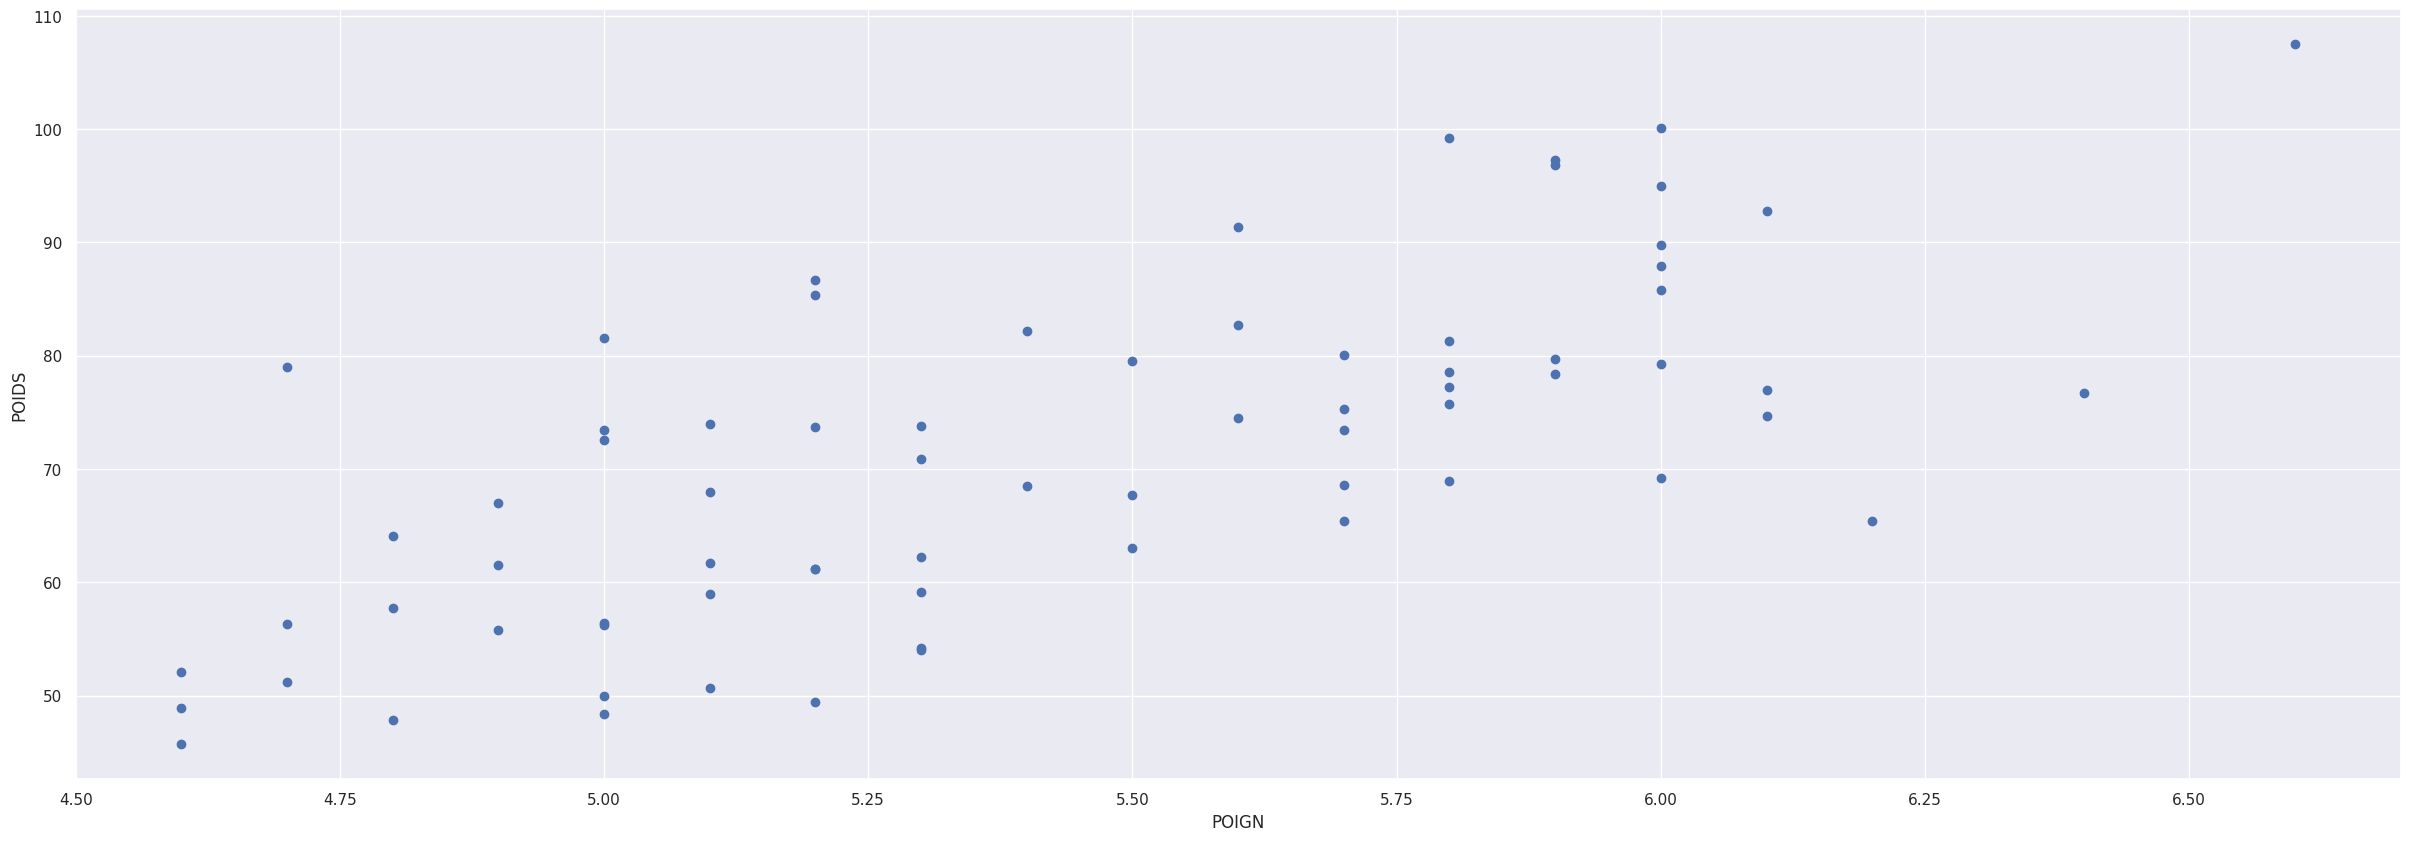

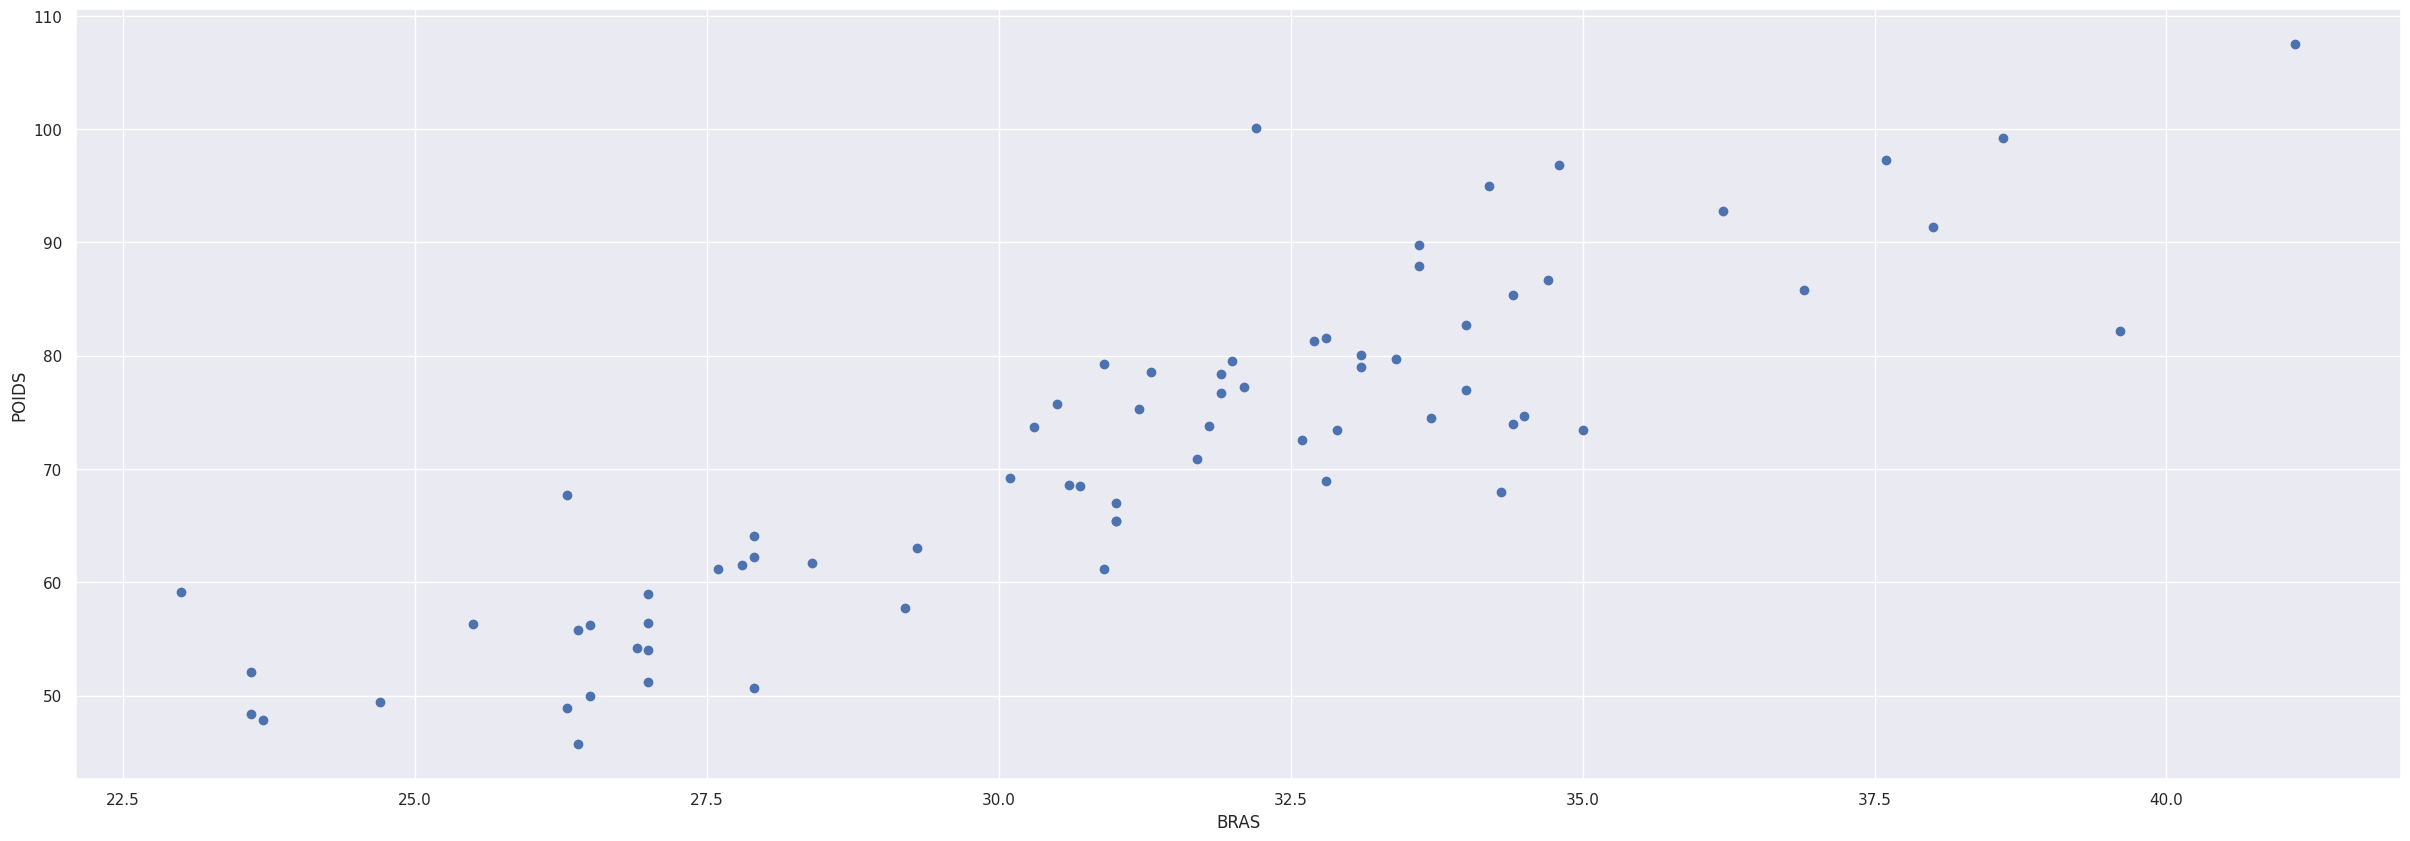

In [44]:
import matplotlib.pyplot as plt
for col in df.columns :
  plt.scatter(df[col], df['POIDS'])
  plt.xlabel(col)
  plt.ylabel('POIDS')
  plt.show()

In [45]:
df.head()

,GENRE,AGE,TAILLE,POIDS,TTAILLE,SYS,DIA,IMC,JMBG,COUD,POIGN,BRAS
0,0,58,179.8,76.7,90.6,125,78,23.8,42.5,7.7,6.4,31.9
1,0,22,168.1,65.4,78.1,107,54,23.2,40.2,7.6,6.2,31.0
2,0,32,182.1,81.3,96.5,126,81,24.6,44.4,7.3,5.8,32.7
3,0,31,174.5,79.7,87.7,110,68,26.2,42.8,7.5,5.9,33.4
4,0,28,171.7,69.2,87.1,110,66,23.5,40.0,7.1,6.0,30.1


In [46]:
df['PAM'] = df['DIA'] + (1/3) * (df['SYS'] - df['DIA'])
df.drop(columns=['SYS', 'DIA'], inplace=True)
df.head()


,GENRE,AGE,TAILLE,POIDS,TTAILLE,IMC,JMBG,COUD,POIGN,BRAS,PAM
0,0,58,179.8,76.7,90.6,23.8,42.5,7.7,6.4,31.9,93.666667
1,0,22,168.1,65.4,78.1,23.2,40.2,7.6,6.2,31.0,71.666667
2,0,32,182.1,81.3,96.5,24.6,44.4,7.3,5.8,32.7,96.000000
3,0,31,174.5,79.7,87.7,26.2,42.8,7.5,5.9,33.4,82.000000
4,0,28,171.7,69.2,87.1,23.5,40.0,7.1,6.0,30.1,80.666667


In [47]:
##correlation de deux variables
corr = df['POIDS'].corr(df['PAM'])
print(corr)

0.5238215379552742


   Feature  Importance
8     BRAS    0.616425
3  TTAILLE    0.212833
2   TAILLE    0.079469
5     JMBG    0.063339
7    POIGN    0.015483
4      IMC    0.004547
9      PAM    0.003364
1      AGE    0.002750
6     COUD    0.001790
0    GENRE    0.000000


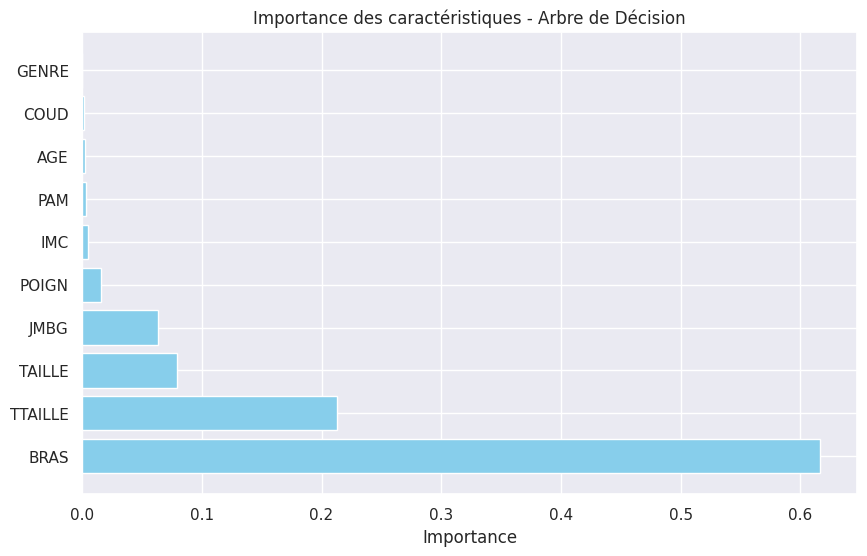


Top 3 des caractéristiques sélectionnées:
   Feature  Importance
8     BRAS    0.616425
3  TTAILLE    0.212833
2   TAILLE    0.079469
5     JMBG    0.063339
7    POIGN    0.015483


In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Charger votre jeu de données (remplacer par votre propre jeu de données)

# Sélectionner les caractéristiques et la variable cible
X = df.drop(columns=['POIDS'])  # Variables explicatives (features)
y = df['POIDS']  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1937)

# Créer et entraîner le modèle d'arbre de décision
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Extraire l'importance des caractéristiques
importances = tree_model.feature_importances_

# Créer un DataFrame pour mieux visualiser les importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print(feature_importances)

# Visualiser les importances avec un graphique
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des caractéristiques - Arbre de Décision')
plt.show()

# Sélectionner les caractéristiques les plus importantes (par exemple, top 3)
top_features = feature_importances.head(5)
print("\nTop 3 des caractéristiques sélectionnées:")
print(top_features)


In [50]:
import pandas as pd

# Supposons que df soit votre DataFrame
correlation = df['IMC'].corr(df['POIDS'])
print(f"Corrélation entre IMC et Poids : {correlation}")

Corrélation entre IMC et Poids : 0.8295491272395797


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ajoutez une constante pour le calcul du VIF
X = df[['TAILLE', 'AGE', 'IMC']]  # Inclure IMC ici pour vérifier la multicolinéarité
X = add_constant(X)

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


  Variable         VIF
0    const  347.707662
1   TAILLE    1.113601
2      AGE    1.217004
3      IMC    1.124845


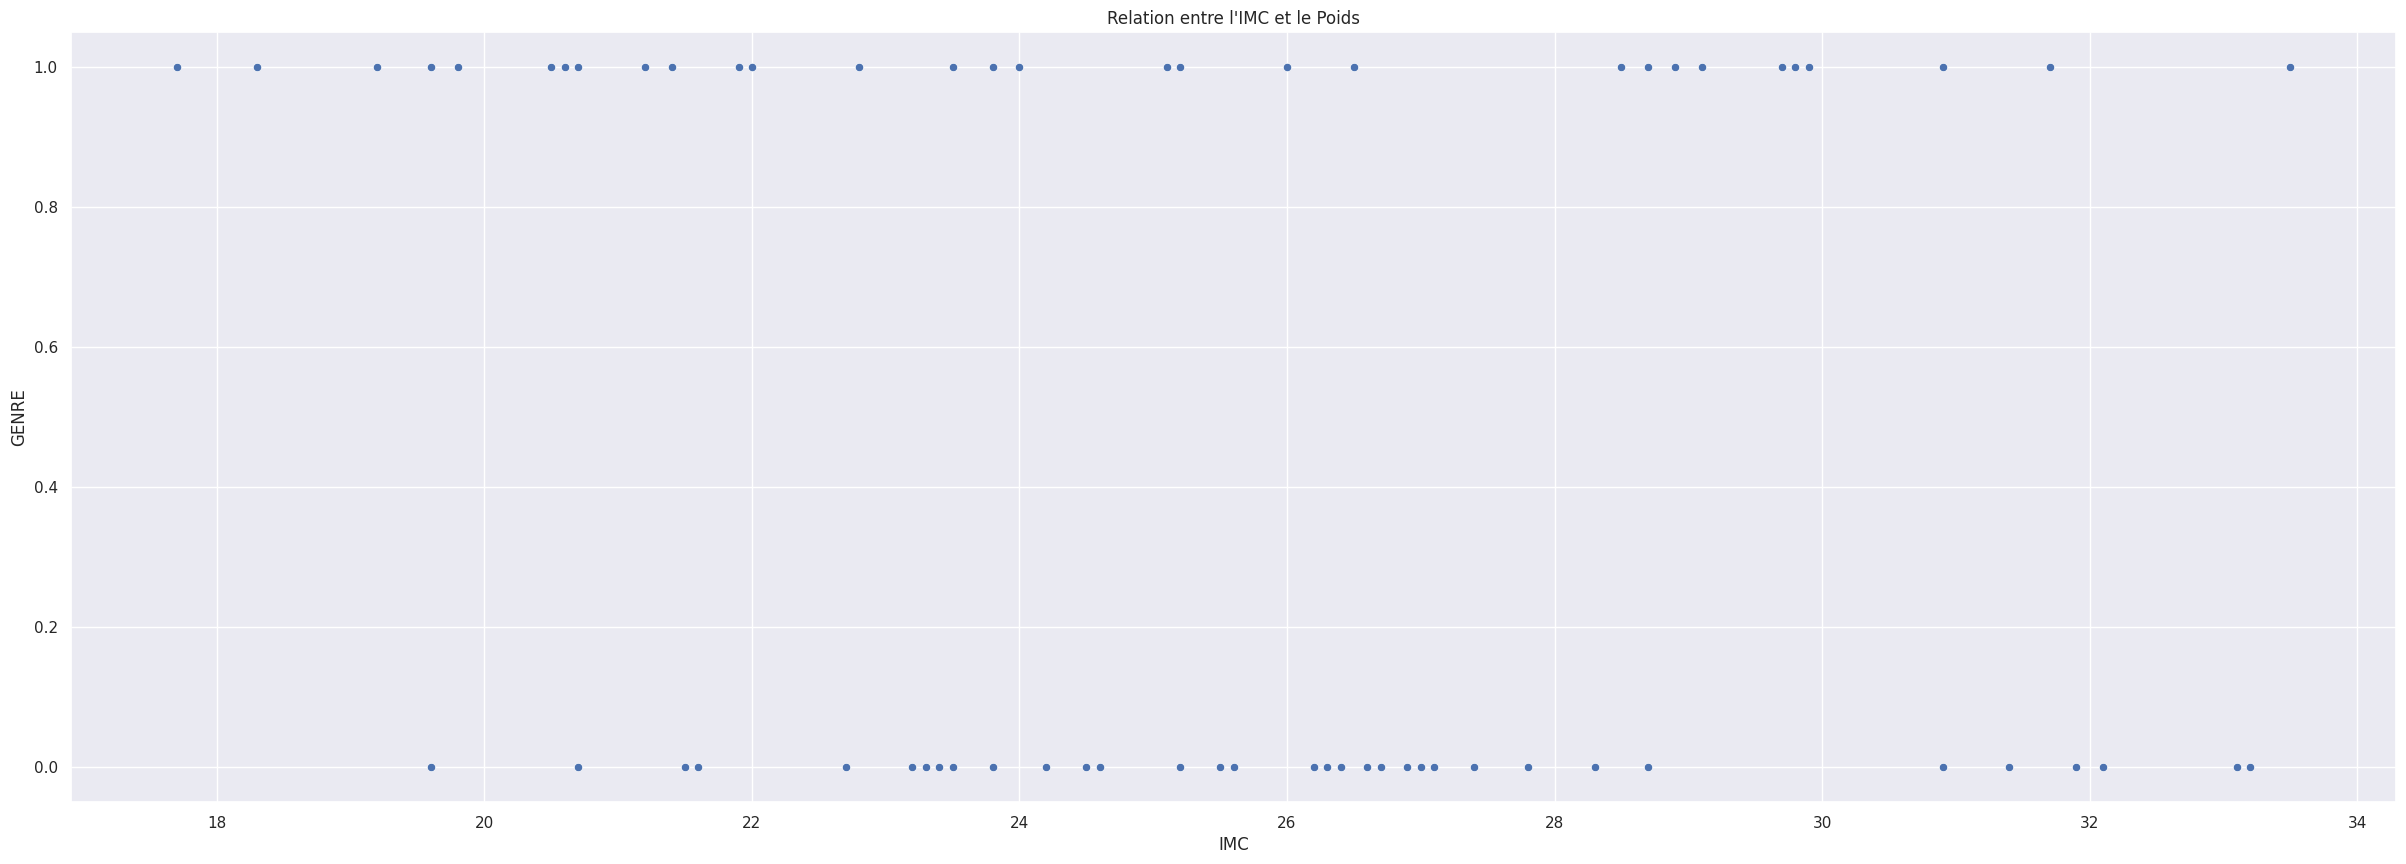

                            OLS Regression Results                            
Dep. Variable:                  GENRE   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.649
Date:                Thu, 28 Nov 2024   Prob (F-statistic):             0.0602
Time:                        18:05:36   Log-Likelihood:                -50.316
No. Observations:                  72   AIC:                             104.6
Df Residuals:                      70   BIC:                             109.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1956      0.383      3.121      0.0

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Scatterplot
sns.scatterplot(x='IMC', y='GENRE', data=df)
plt.title("Relation entre l'IMC et le Poids")
plt.show()

# Modèle de régression
X = add_constant(df[['IMC']])
y = df['GENRE']
model = OLS(y, X).fit()
print(model.summary())

# Calcul du VIF
X_full = add_constant(df[['IMC', 'TAILLE']])
vif_data = pd.DataFrame()
vif_data["Variable"] = X_full.columns
vif_data["VIF"] = [variance_inflation_factor(X_full.values, i) for i in range(X_full.shape[1])]
print(vif_data)


In [56]:
# Régression univariée pour chaque variable
import statsmodels.api as sm
variables = ["TAILLE", "IMC", "BRAS", "PAM", "AGE", "GENRE"]
results = {}

for var in variables:
    X = df[[var]]
    y = df["POIDS"]
    X = sm.add_constant(X)  # Ajouter une constante pour l'interception
    model = sm.OLS(y, X).fit()
    results[var] = model.rsquared
    print(f"R-squared for {var}: {model.rsquared:.4f}")
    print(model.summary())
# Variables significatives (par exemple : TAILLE, IMC, BRAS)
X = df[["TAILLE", "IMC", "BRAS"]]
y = df["POIDS"]
X = sm.add_constant(X)

# Ajuster le modèle
model = sm.OLS(y, X).fit()
print(model.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcul des VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
# Exemple : Tester un modèle réduit
X_reduced = df[["TAILLE", "IMC"]]
X_reduced = sm.add_constant(X_reduced)

# Ajuster le modèle
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())


R-squared for TAILLE: 0.4578
                            OLS Regression Results                            
Dep. Variable:                  POIDS   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     59.11
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           6.85e-11
Time:                        18:07:30   Log-Likelihood:                -272.59
No. Observations:                  72   AIC:                             549.2
Df Residuals:                      70   BIC:                             553.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -102.4036  

<Figure size 1200x1200 with 0 Axes>

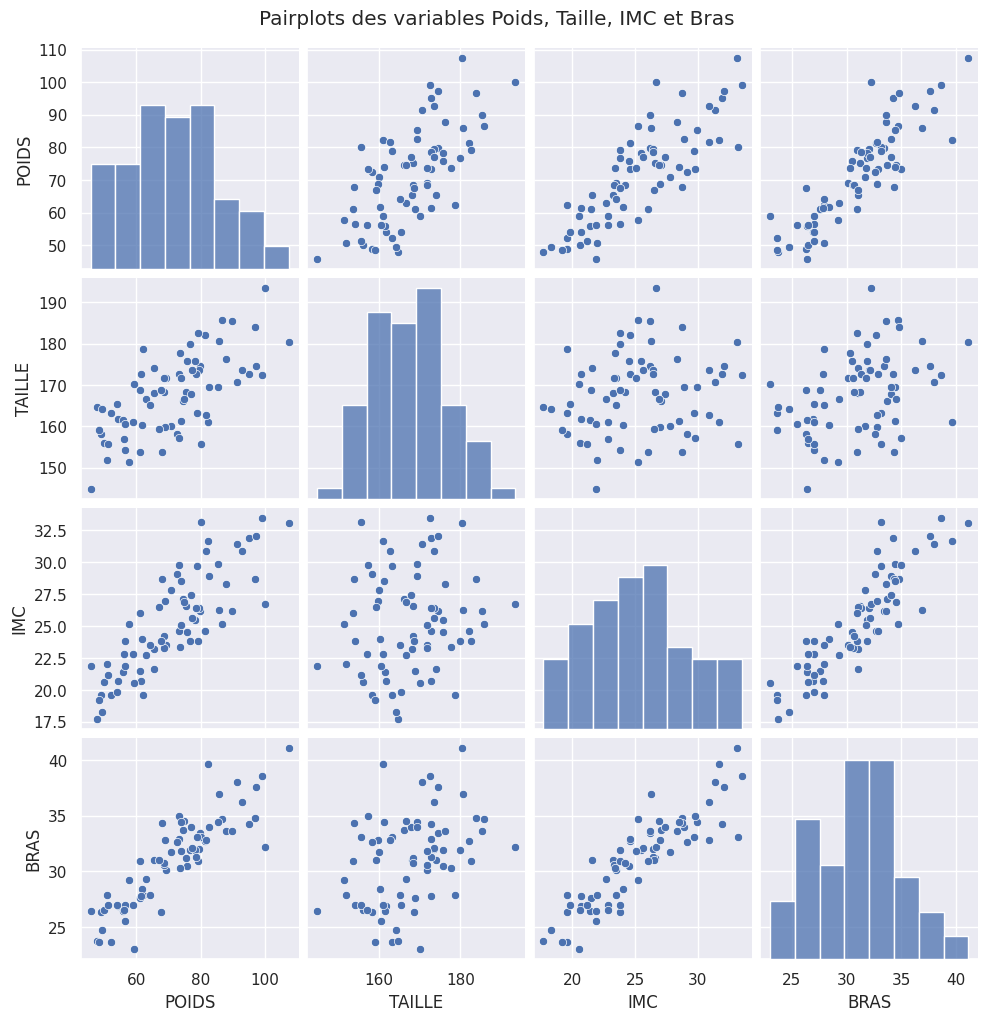

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'data' soit votre DataFrame contenant les variables 'poids', 'TAILLE', 'IMC', et 'BRAS'
# Vous pouvez filtrer les variables qui vous intéressent (par exemple : 'poids', 'TAILLE', 'IMC', 'BRAS').

# Sélection des colonnes pertinentes
selected_columns = ['POIDS', 'TAILLE', 'IMC', 'BRAS']  # Variables à analyser

# Créer un DataFrame avec les variables sélectionnées
selected_data = df[selected_columns]

# Initialiser la taille de la figure pour les pairplots
plt.figure(figsize=(12, 12))

# Tracer les pairplots et les disposer dans une seule figure
sns.pairplot(selected_data)
plt.suptitle('Pairplots des variables Poids, Taille, IMC et Bras', y=1.02)  # Titre au-dessus
plt.show()


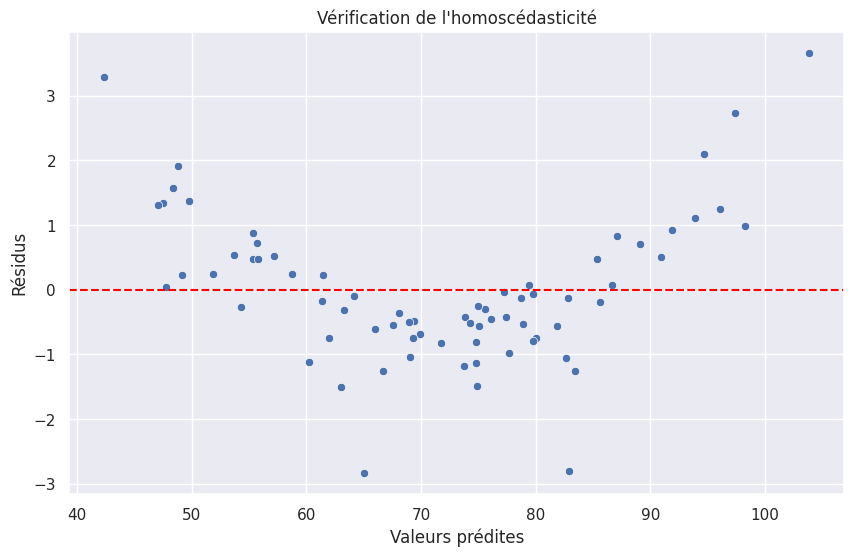

In [59]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# On suppose que 'model' est votre modèle de régression linéaire
# 'y' est la variable cible et 'X' est votre matrice de variables explicatives.

# Prédictions du modèle
predictions = model.predict(X)

# Résidus
residuals = y - predictions

# Tracer les résidus contre les valeurs prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Vérification de l'homoscédasticité")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()


In [61]:
import statsmodels.api as sm
dw_statistic = sm.stats.durbin_watson(model.resid)

print(f"Statistique de Durbin-Watson : {dw_statistic}")


Statistique de Durbin-Watson : 2.219777703391


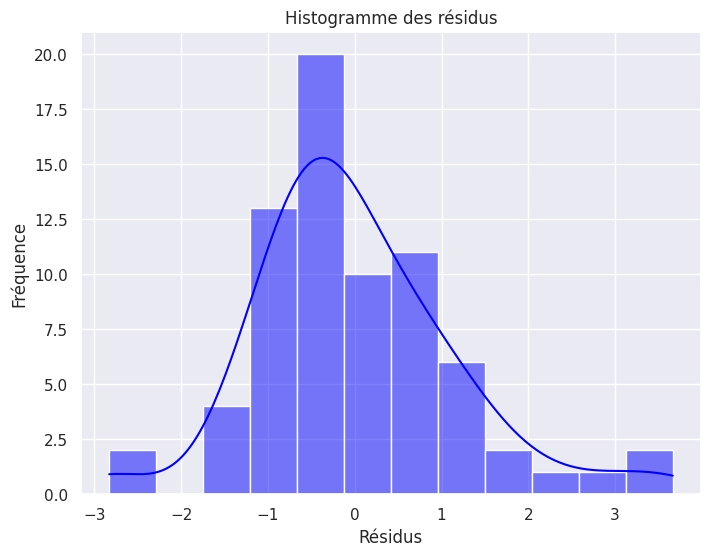

Statistique de Shapiro-Wilk: 0.9493590321858352, p-value: 0.005766362356388857
Les résidus ne suivent pas une distribution normale (hypothèse rejetée).


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Supposons que vous avez un modèle de régression et des résidus
# Par exemple, après avoir ajusté votre modèle :
model = sm.OLS(y, sm.add_constant(X)).fit()  # X est votre matrice de caractéristiques, y est la cible
residuals = model.resid

# 1. Histogramme des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# 2. Test de Shapiro-Wilk pour la normalité des résidus
stat, p_value = stats.shapiro(residuals)

print(f"Statistique de Shapiro-Wilk: {stat}, p-value: {p_value}")

# Interprétation du test de Shapiro-Wilk
if p_value > 0.05:
    print("Les résidus suivent une distribution normale (hypothèse acceptée).")
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
